In [1]:
import pandas as pd
import re
from collections import Counter
import matplotlib.pyplot as plt
from statistics import mean, median, mode

In [2]:
df_train = pd.read_csv(r'ta-emotion10-train.csv', sep='\t', names=['emotion','comment'])
df_train.head()

emotion                                            comment
0  Neutral              நாளைக்கு அரிசிக்கு இந்த நிலமை வந்தா 🙂
1    Anger                               மானம் கேட்ட அன்புமணி
2  Neutral  தவறு இஸ்ரேல் இருக்காது இதை நான் கூறவில்லை ஹமாஸ...
3      Joy  கொங்கு நாட்டு சிங்கம் உன்மையும் நேர்மையும் உலை...
4  Neutral  இவர் யார்? ஒவ்வொரு வார்த்தையும் முன்னுக்கு பின...

In [3]:
df_train.shape

(14208, 2)

In [4]:
df_dev = pd.read_csv(r'ta-emotion10-dev.csv', sep='\t',names=['emotion','comment'])
df_dev.head()

emotion                                            comment
0           Joy  அருமை அற்புதம் பிரமாதம் நண்பரே வாழ்த்துக்கள் ந...
1  Anticipation                     வேல்ராஜ் வேலையா தான் இருக்கும்
2           Joy                 அண்ணன் கிட்டுக்கு வாழ்த்துக்கள் 👍👍
3         Trust                     ஆமா நானும் இதான் யோசித்தேன் 🤣🤣
4  Anticipation  மொத்த மக்களும் ஒன்னு சேர்ந்தாதான் இந்த அரசாங்க...

In [5]:
df_dev.shape

(3552, 2)

In [6]:
df_test = pd.read_csv(r'task_a_test.csv', sep='\t',names=['emotion','comment'])
df_test.head()

emotion                                            comment
0  Ambiguous  நம்மூரில் நம்மொழியில் வழிபாடு செய்ய இவ்வளவு இட...
1   Disguist  தமிழ் நாட்டிற்க்கு வெளியே போய் வாழ்ந்து பாருங்...
2   Disguist               ஆழி ரொம்ப சொம்பு தூக்காத திமுகவிற்கு
3  Ambiguous                                  நா என்ன சொன்னேன்.
4        Joy  மிக நல்ல அரசியல் கலாச்சாரம் நம்ம முதல்வர் 🙏🙏🙏🙏...

In [7]:
df_test.shape

(4440, 2)

In [8]:
import unicodedata as ud

latin_letters= {}

def is_latin(uchr):
    try: return latin_letters[uchr]
    except KeyError:
         return latin_letters.setdefault(uchr, 'LATIN' in ud.name(uchr))

def only_roman_chars(unistr):
    return all(is_latin(uchr)
           for uchr in unistr
           if uchr.isalpha()) # isalpha suggested by John Machin

In [9]:
count = 0
for index, row in df_train.iterrows():
    if not only_roman_chars(row['comment']):
        print(index, row['comment'], row['emotion'])
        print('\n\n')
        count += 1
print(1 - count/len(df_train))

0 நாளைக்கு அரிசிக்கு இந்த நிலமை வந்தா 🙂 Neutral



1 மானம் கேட்ட அன்புமணி Anger



2 தவறு இஸ்ரேல் இருக்காது இதை நான் கூறவில்லை ஹமாஸ் நிறுவனர் யாசின் மாலிக் கூறியது Neutral



3 கொங்கு நாட்டு சிங்கம் உன்மையும் நேர்மையும் உலைப்பும்  இருந்தால் எல்லாம் நம்மை தேடி வரும் வாழ்த்துக்கள் ஐயா இது அவருடைய தனிப்பட்ட வாழ்க்கை நன்றி Joy



4 இவர் யார்? ஒவ்வொரு வார்த்தையும் முன்னுக்கு பின் முரணாக உள்ளது Neutral



5 தினமும் ஸ்டாலின் செருப்ப தொடைத்து கொடுக்குற வன் தான் இந்த ராசா Disguist



6 உண்மையை உணர வைத்த உத்தமர்! Trust



7 அட முட்டா கூ எத்தனை கிராமத்தில் டா இருக்கு வெண்ணை எல்லாமே மாநகரில் மட்டும் தான்டா இருக்கு மாநகரில் மட்டுமே அடித்தட்டு மக்களிடம் பண புழுக்கம் அதிகமா இருக்கு அந்த பணத்தை டாஸ்மாக் மூலமா பணம் பெறுவதே இதுல 80% குடிகார மக்கள் இதே கிராமத்தில் வைத்தால் டாஸ்மாக் வருமானம் வராது இதுதாண்டா அவர்களின் எண்ணம் இந்த மயிரு தெரியாம குற்றவாளி நம்பர் 1 பாராட்டி கிட்டு இருக்க Disguist



8 அருமை நண்பா ...தமிழன் என்பதே பெருமை .. Joy



9 உன்மை... அனைத்து கட்சிகளிலும் வாரிசு அரசியல் ஆட்கொண்டுள்ளது N

518 கொரானவ விட நீங்க போடுற நியூஸ்ச கேட்ட தான் அதிக பயம் வருது..!! Fear



519 உங்களின் நேர்மையான பேச்சு உள்ளது உள்ளபடியே பேசும் பேச்சு அருமை ! வாழ்க வளமுடன் ஐயா Joy



520 அவன் பதவியில் இருந்தப்பையே ப்யூஸ் போனவன்... இப்ப ஒரு மயிரும் இல்ல என்னத்த புடுங்க சொல்ற Disguist



521 உப்பில் பணம் வைத்து அடுத்தவருக்கு கொடுத்தால் என்ன பலன் சொல்லுங்க சார்.. Neutral



522 உலகம் போற்றும் மா மனிதனை தமிழ் தலைவனை கொன்ற அரசியல் சூது Neutral



523 ஐந்து ஆவது நாள் சிடி ஸ்கேன் ல 80%பாதிப்பு ஏற்ப்பட்டு அதிகம் பாதிப்பு ஏற்படக்காரணம் எதனால்.இரண்டு டோஸ் தடுப்பூசி எடுத்து கொண்டார்கள்.டாக்டர் அதிக பாதிப்பு உடன் உள்ளதாக கூறினார்கள் Neutral



524 சகோதரி சமூகத்தில் எந்த பிரச்சனை என்றாலும் துணிச்சலாக குரல் கொடுப்பதை மனதார பாராட்டுகிறேன் வாழ்த்துக்கள். அதேநேரம் விவேக் அண்ணன் சொல்வது போல மிகவும் கவனமாக இருங்கள். மருத்துவ துறையின் அஜாக்கிரதையால் முட்டாள் தனத்தால் ஒரு அற்புதமான மனிதரை இழந்தது நினைத்து மிகுந்த கோபமும் வேதனையும் ஏற்படுகிறது. அவருடைய ஆன்மா சாந்தி அடைய வேண்டும். Neutral



525 தமிழ் தளபதி விஜய் Love



5

992 பார்பனன் செய்யும் தவறுகளுக்கு எவன் செம்பு தூக்கி ஜால்ரா துணை போகிறவர்கள் ஆண்மையற்றவானே Disguist



993 இது தவறான செயல் Neutral



994 இடதுசாரி சிந்தனையே ஒரு நாட்டிற்கு ஆபத்துதான் வீனாப்போன டெமொக்ரேட்ஸ் Disguist



995 இராணுவ அதிகாரியிடம் பேட்டி போடுங்கள் Anticipation



996 என்ன சரவணன் இது.. ஏன் இப்படி. பதவி இல்லன்னா கட்சி தாவல் தானா.. அப்ப கொள்கை முரண் ? Ambiguous



997 நான் தேவன் என்பதைவிட தமிழன் என்பதில் பெருமைகொள்கிறேன் Love



998 தலைகனம்   இல்லாமல்தன்னடக்கம்உள்ள ஒரே தலைவர்   தலைவர் ரஜினிகாந்த்.  🤘🇨🇮🌹 Love



999 யார் என்ன சொன்னாலும்  மாணிக்கம்  நம்பமாட்டார் தான் பெரிய  கிரிமினல்  லாயர் என்று பெருமை பட்டுக்கொள்ளும் டைகர் பிரியா சொல்வது  உண்மையா பொய்யா என்று கூட  கண்டுபிடிக்க தெரியவில்லை  என்னதான்  இருந்தாலும்  பெண் பாசம் இப்படியான கண்மூடித்தனமாக  நம்புவது Ambiguous



1000 கோவை மக்கள் சரியாக முடிவை எடுங்கள்.நன்றி Love



1001 உங்களிடம் பிடித்தது நீங்கள் சுடும் வடை தான் Love



1002 ஸ்ரீராம ஜெயம் என் குழந்தைகள்  நலம்பெற வேண்டும் என் குழந்தை படித்து வருகின்றனர்  படிக்க வேண்டும்

1435 விளையாட்டு செய்திகள் முடிந்து விட்டது நன்றி Joy



1436 வெற்றி நடைபோடும் சாமான் முன்னேற்ற கழகம் Anger



1437 எனது ஐயாவின் பூர்வீகமும் வல்வெட்டித்துறைதான். தாய்நாட்டைப்  பிரிந்து தவிக்கின்றோம். Sadness



1438 நீங்கள் பேசுவதே ஒரு படம் பார்த்த உணர்வை கொடுக்கிறது அண்ணா... Love



1439 சீமான் விடுதலை புலிகளின் அனுமதி இல்லாமல் Neutral



1440 * தலைசிறந்த  இந்தியர் * Trust



1441 தமிழ் மக்கள் ஒரு வாரமாக விஜய சேதுபதியிடம் Neutral



1442 சங்கிகள் கதறல்கள் அதிகமாக இருக்கிறது Fear



1443 எங்கள் ஊரிலும் பரவி வருகிறது இந்த விரைவில் சரியாக இறைவனை வேண்டுகிறேன்... Anticipation



1444 அவரோட விரல் காங்தம் Surprise



1445 மற்ற தொகுதி திமுக எம் எல் ஏ எங்கே... முதல்வர் மற்றும் உதயநிதியை மட்டுமே காட்டுகிறீர்கள்... Ambiguous



1446 நல்லா தின்னுட டோய்🤗 Disguist



1447 திருவாரூர் முத்து வேலர் கருணாநிதி @திமுக Neutral



1448 சரியாக சொன்னீர்கள்  பெருமைப்படுகிறேன் Joy



1449 பத்து வயதில் கேட்ட ஞாபகம் Neutral



1450 அக்கா உங்க இலையில் கொஞ்சமா இருந்து இது போங்கு ஆட்டம் Neutral



1451 அப்படியே அவரி

1774 அண்ணன் வெற்றி பெற கூடிய நாள் நிச்சயம் வரும். எங்களின் வேண்டுதழும் வாக்கும் என்றும் அன்பு அண்ணணுக்கே Joy



1775 நிவாரண நிதியிலிருந்து 100 ரூபாய் கூட தர மாட்டேங்குறாங்க எங்க வீட்ல. நான் ஏன் கட்டுப்பாட்டு டன் இருக்கனும்.😭😭😭 Disguist



1776 பேடிஎம் திரும்பவும் வந்துவிட்டது Neutral



1777 தமிழ் திரைஉலகத்தின் சிறந்த தொடக்கம் 🌹🌹 Joy



1778 எதுவானாலும் மனிதம் முக்கியம் Neutral



1779 வியாபாரம் முடிந்தால் கடையை காலிசெய்வது முறைதானே? Ambiguous



1780 எஸ் பிபி அண்ணாவுக்கு இளையராஜா  கிட்டகேட்கனும்னு தெரியாதுன்னு சொன்னாரே தெரிந்தால் கேட்டிருப்பேன் என்றாரே அங்க நிக்கிறார் எஸ் பிபி Neutral



1781 திமுகவிற்கு எதிராக பேசுவதால் சீமானை வளர விட்டார்கள் இவனது வரலாற்றை இன்னும் யாரும் பேசவில்லை இவனது உண்மை முகத்தை மக்களிடம் வெளிச்சம் போட்டு காட்ட வேண்டும் Anticipation



1782 போண்டா மூக்கா  உன்ன பாத்தா தான் பஸ் ஸ்டாண்ட்ல லேகியம் விக்கிறவன் மாதிரி இருக்கு .😀😅😂😆😇 Disguist



1783 தேர்தல் பிரசாரம் ஆரம்பித்த நாள்முதல் வாக்குகள் எண்ணும் நாட்கள் வரை கொரோன வை கண்டு கொள்ள வில்லை Surprise



1784 நீங்கள் 

2020 கவுண்டர் கவுண்டர் தான்யா Neutral



2021 நீங்களாம் காதரணும்னு தான் இந்த வேலையை பாக்குறோம் Anger



2022 எதிர் கட்சி .ஏது???? Ambiguous



2023 ரஜினி கமல் பத்தி எங்க சேர்த்து இருக்காங்க Ambiguous



2024 ஆயுள் தண்டனை என்பது எவ்வளவு காலம்?? Ambiguous



2025 உண்மையில் இந்த நடவடிக்கை. பாராட்ட வேண்டும்.நல்ல முயற்சி.. Neutral



2026 தமிழ் நாட்டின் சிறப்புமிக்க முதலமைச்சர் நீங்கள்தான் ஐயா இப்பொழுது Love



2027 நீ ஏன் இவனுக்கு முட்டு கொடுக்கிற ?? ரொம்ப நல்லவன் தான் பொண்டாட்டியை கை கழுவி விட்டுட்டானா ? Disguist



2028 மதன் நண்பரே எப்போதும் நன்றாக இருக்க இயற்கை பஞ்ச பூதங்களை வேண்டுகிறேன் வேளாண்மை சார்ந்த கண்டுபிடிக்க பணிவன்புடன் கேட்கிறேன் Anticipation



2029 4 பார் நண்டு 5.முறல்21. சிங்கிரால் 25 கடவுரால் Neutral



2030 ஒரு நாள் இப்படியே திரிந்தால் என்னாகுமோ தெரியாது நாடே பிச்சை எடுக்குது இதில் இந்த காணொளி தேவையா? Disguist



2031 அழகு 😍அழகு😍 கார்த்திகா குடும்பத்தினர் அனைவருக்கும் கார்த்திகை திருநாள் வாழ்த்துக்கள்😘😍😘 Joy



2032 திருவண்னா மலை அன்னதானம் செய்வதாக வந்தது விலாசம் Neutral


2458 ரசிகன் என்பவன் தன் முதலாளி நடிகனுக்கு 100 கோடி ரூபாய் சம்பளம் கொடுக்கும் வேலைக்காரன். Neutral



2459 ராஜா  இசை ஒரு மருந்து Neutral



2460 அடடே புது கான்செப்டா இருக்கே  பாக்கலாம் போல என்ன ஒன்னும் புரியல அவ்ளோதான் Trust



2461 அங்கு உள்ள அனைவரும் அப்படி தான் Trust



2462 வாழ்த்துக்கள் ஐயா . நானும் தங்களை போல் இயற்கையை பின்பற்றி வாழ முயற்சிக்கிறேன் Anticipation



2463 ராம்குமார் நீ வாதம் பண்றதுக்கு கமெண்ட் போட்டுக் கொண்டிருக்கிறாய் நீ யார் என்பது எனக்கு புரிந்துவிட்டது Anticipation



2464 நாகர்கோவில் பேச்சு தான..... Neutral



2465 எந்தக் கலைஞர்களுக்கு சார் Ambiguous



2466 பாமக வை கூட்டணியில் சேர்க்கும் கட்சிக்கு இந்த தேர்தலில் வாக்களிக்க கூடாது Anger



2467 நீங்கள் உதவி செய்ய வேண்டாம் உவத்திரம் பன்னாமஇருந்தா போதும் Anticipation



2468 இது சுண்னட காயா? Ambiguous



2469 அரபுநாடுகளில் தவிக்கும் கேரள மக்களைக் கொண்டுவர கேரள அரசு 44 விமானங்களை ஏற்பாடு செய்திருக்கும்போது Neutral



2470 எந்த டாக்டர் ரா பாக்கணும் ன்னு சொல்லுங்க. என் அம்மா க்கு வந்துருக்கு யாரும் டிரீட்மென்ட் பண்ண

2924 புகை பிடிப்பீர்களோ? மீசையிலெல்லாம் புகையாயிருக்கிறதே! Disguist



2925 உடிபி ஜீவிஷ் பிராமின் கோடாரி கமல் ஹசன் தனது முன்னோர்களான பராசுராமன் மற்றும் சகுனி போல தோற்கடிக்கப்பட்டார் Anger



2926 இதுல இருந்து என்ன தெரியுது. நாடு கொள்ளைக்காரர்களிடம் சிக்கி நாசமாகபோகுது.மகாத்மா காந்தி தாத்தா இவனுங்ககிட்ட இருந்து தமிழ்நாட்டுக்கு சுதந்திரம் வாங்கி தாங்க😭😭😭 Disguist



2927 டாய் அங்கென்டடா ஒரே கிசு கிசு. என்ன கேட்டா நம் சொந்த அப்பனுங்களே சரியிலைய்யே !உண்மைய பேசுங்கள் என் நைனாவையே எனக்கு பிடிக்காது நுறு வப்பபாட்டி வச்சிருந்தா (சிங்கை தெலுகன் ) நீங்கள் அத்தனை பேரும் உத்தமர் தானா சொல்லுங்கள் ?? Anger



2928 ஈழத்தமிளினத்தில் நாம் பீ றமிழர் என்கிற சாணார் சாதியே இல்லை Trust



2929 சுதேசியின் எங்கள் தலைவன் வ உசிதம்பரம்பிள்ளை வாழ்க  வஉசி புகழ்❤️ Joy



2930 தமிழனின் பெருமை உலகறியட்டும் Love



2931 அக்கா சூப்பர் இன்னோவேட்டிவ்வா இருக்கு Joy



2932 ஊசி இன்னும் யாரும் போடல . அதனால உயிரோட இருக்காங்க Neutral



2933 பதில் சொல்ற முறையே சரி இல்ல 😝😝😝😝 Neutral



2934 நண்பா ஏங்க மாடு சினை ஊசி போட்ட பிறகு

3435 அருமை வாழ்த்துக்கள் அம்மா Joy



3436 கொல்லவராங்கனு தெரியுதுல..திரும்ப அந்த வீட்டுக்கு ஏன் ராசா போன? Neutral



3437 ராஜேந்திரன் பாலாஜி செம்ம Neutral



3438 தேவையான தகவல்களை பேசவும் குற்றவாளி என்று பேசவும் கடந்த கால நிகழ்வுகள் குப்பையில் வீசிய காகிதங்கள் ராஜ கோபாலன் போல பலர் அப்பள்ளியில் உள்ளனர் அவர்களை தண்டனை விதிக்க பட வேண்டியவர்கள் Neutral



3439 நல்லா இருக்கு. கேட்கும் போது நிறைவாக உள்ளது 🙏. எதற்கு இந்த விளம்பர குறுக்கீடு Neutral



3440 இது போல் தமிழ் நாட்டில் எடப்பாடி நாய் புரிந்து கொண்டால் சரிதான் Neutral



3441 திமுக பிறகு அதிமுக Neutral



3442 உண்மை தான் நண்பா தேவா அவி சூப்பர் Joy



3443 எடிட்டிங்கில் சம்பந்தமே இல்லாமல் காட்டெருமை காட்டுகிறீர் Disguist



3444 வேப்பிலை  சாமியார். Neutral



3445 ஆத்மா சாந்தி அடைய இறைவனை வேண்டுகிறேன் Love



3446 என் கணவரின் குடும்பம் நல்ல கிணற்றை மூடியால் பல கஷ்டங்களை அனுபவித்து விட்டது. அதற்காக பலன்களையும் பரிகாரங்களையும் தயவுசெய்து கூறுங்கள். Neutral



3447 பல்லாத்தா ரொம்ப திமிரா ? தேர்தல் ஓட்டு கேட்டு வா சானியை   எடுத்து உன் வாயி

3808 கட்டாயம் செருப்பு போடனும் ஒரு நாளும் செருப்பை கலட்டி வச்சிட்டு ஓட்டுவது மிக தவரு செருப்பு கொஞ்சம் கொஞ்சமா நலுவி பிரேக் கீல போயிடும் அப்பரம்  அவசரமா பிரேக் பிடிக்கும்போது பிரேக் பிடிபடாது Neutral



3809 அது டிரஸ்ட் சார் இது தனி நபர்  நடத்தும் மெஸ் Neutral



3810 சாக துணிந்து விட்டார்கள் சங்கி கூட்டம் Neutral



3811 பட்டியல் இனத்தவர் மற்றும் பழங்குடி மக்களின் உழைப்பை புரிந்து கொண்டு திராவிட கட்சிகள் மரியாதை கொடுக்க வேண்டும். அவர்கள் உழைப்பு இல்லாமல்  சோறு கிடைக்காது. விவசாயம் நின்றுவிடும் அவர்களளை தரக்குறைவாக நடத்தினால் Ambiguous



3812 திருச்சிற்றம்பலம் தில்லையம்பலம் சிவகடாட்சம் பரிபூர்ணம் Love



3813 வாலியின் வரிகள் அற்ப்புதம் Love



3814 ஆர் சுந்தர்ராஜன் எனக்கு ஏன் இந்த கெட்டகாலம் நல்ல டைரக்டர் நல்ல நடிகர் அதோடு போக வேண்டியதுதானே இந்தப் பேச்சு அழிவை உண்டாக்கும்... போரூர் பிஎஸ் பரமானந்தம் Sadness



3815 வடக்கு கிழக்கு சார்ந்ததுதான் ஈழம் என்ற சொல். மலையக தமிழர்களும்  ஈழ விடுதலைக்காக போராடி உயிர்நீத்துள்ளார்கள். அதே போல் சில இஸ்லாமிய தமிழர்களும்  தமிழீழ போராட்டத்தில் போராடியவ


4206 சிறந்த சொற்பொழிவு ... தமிழ் ... என்ன ஒரு அழகான மொழி .. காதுகளுக்கு கூட தேன் ... நன்றி .. தயவுசெய்து மேலும் தலைப்புகளை சொற்பொழிவு செய்யுங்கள் ... Neutral



4207 ஏன்டா கரோனா பசி கொடுமைல கூட 1000/-தான டா குடுத்தீங்க 😏 Anger



4208 கல்லா கட்ட மருந்து மாபியாக்கள் இந்த பிச்சைகார டாக்டர்களை வச்சு பேச சொல்றானுங்க. Sadness



4209 நன்றி. ஆமாம். காக்கை குருவி நம்ம ஜாதி தான் Neutral



4210 🙏❤🌹ஓம் சாய் ராம் 🌹ஸ்ரீ சாய் ராம்🌹 ஜெய் ஜெய் சாய் ராம் 🌹சாய் அப்பா நீங்களே துணை🌹❤🙏 Love



4211 செல் முருகன் சார் எங்கே அம்மா Ambiguous



4212 கடைசி வரைக்கும் அந்த பொண்ணு யாருன்னு சொல்லவே இல்ல Neutral



4213 ஓரு புட்டை நடக்காது Disguist



4214 😭😭😭😭😭😭நான் ஒரு அரசு பள்ளி ஆசிரியர் என்னால தாங்க முடில காலைலேந்து Sadness



4215 ஜாதி பத்தி நீ தான் பேசுற Anger



4216 சரியான தேர்வு.... ❤❤ Joy



4217 தண்டனை கடுமையாக இருந்தால் Ambiguous



4218 சூரியகிரகனதன்று கடன் வாங்கிய பணத்தை திருப்பிக் கொடுக்கலாமா? Ambiguous



4219 ￰பாலகிருஷ்ண￺ன் அவர்களுக்கு  சீமான்  பேசியது  புரியவில்லை என்று  நினைக்கிறேன்... Anticipa

4699 👍👍👍👍 அருமையான பதிவு ஐயா 🙏 Joy



4700 குழந்தையை அவள் தான் தள்ளிவிட்டு கொன்றிருக்க வேண்டும் Anger



4701 தெள்ளத் தெளிவாக  கூறுகிறார் 👏👏👏 Joy



4702 எப்படி வைக்க கூடாது என்று சொல்லிவிட்டீர்கள்.எப்படி வைக்க வேண்டும் என்று சொல்லுங்கள். Anticipation



4703 திமுக ஆச்சியின் கரன்டு பொனத நபுகபடுத்தவும் அண்ணா Neutral



4704 இந்திய இறையாண்மைக்கு மதிக்காமல் வீர சைவன் வீர ராவணன் என்று புளுகி கொண்டு திரியும் ஆமை தனி தேசத்திற்கு வெரட்டி அடிக்க வேண்டும்.. Anger



4705 திருப்பி திருப்பி கேட்டேன் சாணக்கியனின் வார்த்தையை Neutral



4706 எண்ணம் உயர்வாக இருந்தால் வாழ்க்கை படிக்கட்டாக மாறி மேலே பயணிப்போம் என்றுமே வந்த வழியையும் வந்த பாதையையும் முன்னேற உறுதுணையாக இருந்தவர்களையும் ஒருபோதும் மறக்கக்கூடாது Neutral



4707 நீங்கள் எடுத்திருக்கும் வழி சரியானது Neutral



4708 சகோதரர் வி௫தாச்சலேஸ்வரர் கோவில் பத்தி போடுங்க Anticipation



4709 தரமான திடமான பதிவு அற்புதம் ஆனந்தம் மகிழ்ச்சி வாழ்த்துக்கள் வாழ்க நலமுடன் வலமுடன் தமிழ் வளர்க வாழ்க Joy



4710 தூய  தமிழ் பேசும்போது கேட்கவே மிக சந்தோசமா இருக்கு  


5108 இந்தப் பாடலைக் கேட்கும் போதெல்லாம் அழுகை வரும் Sadness



5109 தலைவரே நீங்க ஒரு 🌹🌹🌹😫 Neutral



5110 தயவு செய்து பாடலாசிரியர் பெயர்களை  இதில் பதிவு செய்யுங்கள் அவர்களின் தனித்துவமான வரிகள் இவை Anticipation



5111 அது போன மாசம்.... Neutral



5112 கமலஹாசன் என்ன காசா குடுத்தாராம்... Ambiguous



5113 குழம்புக்கு போற மஞ்சள் போடலாமா Ambiguous



5114 தலைவனா ? இது ல தனஞ்செயனுக்கு டாக்டர் பட்டம் வேற... தலைவன் என்பதற்கான அர்த்தம் தெரியாமலே எப்டிய யா படிச்சு பட்டம் வாங்குனீங்க.. கேவலம் பணத்துக்காக இப்படி பேசுவதா? Anger



5115 நான்கு நிமிடங்கள் வீண் Sadness



5116 ஆயிரத்தில் ஒ௫வன் பாகுபாலி விட அ௫மையானா கதை நல்ல திரைக்கதை படம்   ஹிட் ஆகல இரன்டாம் பாகம் வர வேன்டும் Neutral



5117 அடே நீங்க சன்னிலியோனி மியா கலிபாவை கும்புர உங்களுக்கு இவர் அம்மாகதான் விளங்கும் இஸ்லாமிய சட்டப்படி இவர் போன்ற விபச்சாரியை கல்லால் அடித்து கொள்ள வேண்டும் விபச்சாரிக்கு மன்னிப்பே கிடையாது நீ விபச்சாரம் செய்துதான் திங்கனுமா வீடு வேலைக்கு போய் திண்ணேன் ஆனால் விபச்சாரத்தை நியாயப் படுத்தாதே உனக்கும் உன் செயலுக்கும் இ

5551 உங்கள் துலைபேசி என் வேணும் ஐயா கிடைக்குமா Ambiguous



5552 இது ரொம்ப ஓவர். அடிமைகளை போல நடத்தும் போலீசை சஸ்பெண்ட் செய்ய வேண்டும்.. தவறு என்றால் வழக்கு போடுங்கள் சிறைக்கு தள்ளுங்கள் இதையெல்லாம் கேட்க அங்கே ஒரு ஆண்மகன் கூட இல்லையா? கொள்ளையர்கள் துப்பாக்கி முனையில் இதே போல போலீசை செய்ய வைத்து வீடியோ வெளியிட்டால் எப்படி இருக்கும்? ஒருவரின் சுயமரியாதையை சீண்ட வேண்டுமா? Ambiguous



5553 அண்ணா பழந்தமிழர் ஆடை நாகரிகம் குறித்து ஒரு காணொளி வேண்டும் ✌🏽✌🏽✌🏽 Trust



5554 இதெல்லாம் சொல்ல ஒரு தைரியம் வேண்டும்.... இப்பவாது சொன்னயே அம்மனி.... Neutral



5555 போய் தானே ஆகனும் பொழப்ப ஓட்டனும்ல....முதல்ல இந்ந. காவல்துறையில் உள்ள தவறான அதிகாரிகளை  நீக்கி விட்டு புதிய இளைஞர்களை தேர்வு செய்யுங்கள் தளபதி.... Anticipation



5556 அது லாடம் ப்ரோ கடிவாளம் இல்ல Neutral



5557 இன்னிக்கு இந்திய சினிமாவில் மட்டுமல்ல உலகளவில் அனைத்து நாடுகளிலுமே சினிமா துறை வாரிசுகளுக்குத் தான் சிகப்புக் கம்பளம் விரித்து இருக்கிறது ஆனால் தமிழ்நாட்டில் அஜித் மும்பையில் கங்கனா சுஷாந்த் போன்றவர்கள் மட்டும் இதற்கு விதி விலக்காக 

5986 பாமர மக்களின் கதறல் இதுவே 🤨🤨🤨 உதவாத அரசு  ஒன்றுக்கும் பயன் இல்லை Sadness



5987 சங்கி அரசாங்கம்  ;-          ஆமாம் இவர்கள்தான் உண்மையான ஆன்ட்டி இந்தியஸ் போல Anger



5988 மாணவர்கள் மீது குறை கூற வேண்டாம் அவர்கள் அவ்வாறு செய்வதற்கு காரணம் நீங்கள் தான் உங்களது புதிய வழிமுறை சரி இல்லை Disguist



5989 அது ஓகே..ஆனா இந்து மதத்தை மதியுங்கள் 10 வருடம் நீங்க தான் முதல்வர் Neutral



5990 அண்ணாமலை போன்ற ஐபிஎஸ் பதவியில் உள்ளவர்கள் அதனை விடுத்து அரசியலுக்கு வருவது அபூர்வம் வயதில் குறைந்தவராக அண்ணாமலை அவர்கள் மக்கள் சேவையாற்ற வந்திருப்பது வரவேற்கத் தகுந்தது .அரசுக்கும் கடைக்கோடி மனிதர்களுக்கும் இடையில் இருக்கும் எட்டாத தூரத்தை குறைக்க மக்கள் நலத்திட்டங்கள் மக்களுக்கு சென்றடைய இவர் என்ன மாதிரியான நடவடிக்கைகளை மேற்கொள்வார் என்பது இவரின் செயல்பாடுகளை பொறுத்தது. பொறுத்திருந்து பார்ப்போம். ஆனால் ஒன்று நன்கு படித்து அப்பளுக்கற்ற முறையில் செயல்பட்டார் என்கிற பாராட்டுதலோடு அரசியலில் நுழைந்திருக்கிறார். அவர் இதனைப் பயன்படுத்தி மக்கள் பணியாற்ற வேண்டும். அரசியலிலும் அப்பழுக்கற்றவர் என்கிற பெயரை இளைய சம

6444 கல்கத்தாவில் ஏற்கனவே அலுவலகம் இருக்கிறது .... Surprise



6445 அருமை அண்ணா..எகிப்தில் இருந்து சிவா.உங்கள் சாட்டை அடி சூப்பர் அண்ணா...சங்கிகளுக்கான சாட்டை Joy



6446 அப்துல் கலாம் க்கு இவர் ஆலோசகரா ?? அவர் இருக்கும்போது இவர ஒருவாட்டி கூட பார்த்ததில்லை Neutral



6447 குழிபனியாரம் பாக்கும் போதே நன்றாக இருக்கிறது Joy



6448 திரு. வீரபாபு சார் அவர்கள் களின் பணி சிறக்க என்னுடைய வாழ்த்துக்கள். கொரானாவால் என் வீட்டில் ஒரு இழப்பு ஏற்பட்டு வருத்தத்துடன் இந்த பதிவை செய்கிறேன். என் தம்பி இழப்பிற்கு பிறகு எனது மகனுக்கு பாஸிடிவ் வந்து வீரபாபு கூறிய முறையில் கசாயம் மற்றும் ட்ரீட்மென்ட் எல்லாம் வீட்டில் இருந்து செய்து வந்தோம். 20 நாட்கள் ஆகி விட்டது. ஜுரம் உடல் வலி எல்லாம் இப்போது பரவாயில்லை. இரண்டு நாட்கள் முன்பு தொடர்ந்து மூன்று மணி நேரம் வரை வாமிட்  பண்ணிக்கொண்டு இருந்தான். அதில் வெரும் கோழை மட்டுமே வந்தது. பிறகு நிற்காமல் இருமலால் மிகவும் சிறமப்படுகிறான். நாங்கள் கை வைத்தியமாக நிறைய செய்து பார்த்தோம். இன்னும் குறையவில்லை. அதனால் தூக்கமும் இல்லாமல் மிகவும் சிரமப்படுகிறான். இதை படிப்பவர்கள் 

6748 மிகவும் அருமை சகோ. நீங்கள் கூறுவது 100 சதம் உண்மை Joy



6749 அபராதம் வாங்கும் பணத்தை கொரோனா நிவாரண நிதிக்கு வழங்க வேண்டும். Anticipation



6750 வழக்கறிஞர் ஜோதி அறிவாலயம் வரலாறு Neutral



6751 சாதியெனும் சாக்கடையை  விட்டு விலகி  சகோதரத்துடன்  கைகோர்த்துப்  பயணிப்போம்  ஒற்றுமையாக  தொடர்ந்து Anticipation



6752 இதை கேட்டாவாது இவர்கள் மண்டையிலே  ஏறுமா .அருமை சகோதரி  அருமை அருமை Neutral



6753 இனிய பாடல் நடுவுல விளம்பரம்  து  போங்கடா Disguist



6754 உங்க வீட்டு பெண்களையும் அழைத்து சென்ற உங்க நல்ல மனசுக்கு ஒரு சல்யூட்... நிச்சயமா நீ வீரன்யா... ஆனா அடுத்த முறை பத்து இருபது பேர் சேர்ந்து போங்க.. மறக்காம பெண்களையும் அழைத்து செல்லவும்... Anticipation



6755 @காஞ்சி சிங்கம்🐆  😊😊 Neutral



6756 இங்கு எத்தனை கமெண்ட்க்கு லைக் போடுவது என்று தெரியவில்லை.. முடிந்த வரை லைக் பன்னிட்டேண்.. நாம் தமிழர்.. நாமே தமிழர்.. வெல்லட்டும் விவசாயம்.. அமையட்டும் நாம் தமிழர் அரசு... நாம் தமிழர் Trust



6757 பால் காய்ச்சு தான் ஊர்தனும்மா அக்கா Ambiguous



6758 அம்மா விரைவில் நலம் பெற வாழ்த்துகிறேன். Joy


7198 ஹைப்பர் லூப் என்று நினைத்து பாதாளச் சாக்கடையில் இறங்கிய  அண்ணன் வேல்ராஜ் Disguist



7199 நான் ஐந்து வருடம் அம்மா வீட்டில் என் கணவர் குலதெய்வத்தை எப்படி மா வழிபாடு செய்வது தயவுசெய்து சொல்லுங்கம்மா Neutral



7200 அழகு கொஞ்சம் அழகு நம் தமிழ் 👍🏻🙏👌🏻 Love



7201 சாட்டை! 9 நிமி 30 செக்கன் இல் உங்கள் பின்னால் சிலகிரகங்கள் பார்க்கமுடிந்தது கவனம் ஏழரைக்குள் அகப்பட்டுவிடவேண்டாம். Anticipation



7202 அருமை அண்ணா வாழ்க வளமுடன் Love



7203 அனைவருக்கும் அரசு வேலை என்பது சாத்தியமில்லை.ஆனால் சுய தொழில் தொடங்க வங்கி கடன் பெற உதவலாம்.கரூரில் இதை ஒரு லட்சம் இளைஞர்கள்/ மகளீர்களுக்காக ₹50 Ambiguous



7204 அவரு டெல்லி ல பல வருஷமா இருந்தவர். Neutral



7205 ஐயா  அவர்களுக்கு தமிழர்களின் எதிராக திமுக இருக்கா இல்லையா Ambiguous



7206 கமலும் ஊழல் எதிர்ப்பு என்ற உலக மகா தத்துவத்தை கடைப்பிடித்தார். Neutral



7207 80 கோடிக்கு ஒரே ஒரு சுனாமி வந்தால் சோலி முடிஞ்சுரும் Sadness



7208 இனிய காலை வணக்கம் 🙏🙏 Joy



7209 அப்ப நீ மோடி சுன்னி ஊம்பு Disguist



7210 ராஜீவ்காந்தி படுகொலையும்.... ஈழ தமிழர் இனப்படுக

7610 ஆமாம் நண்பா  எங்க. மேக்குடி மாவட்டத்துலயும் ட்ரெயின் வர வரமாட்டேங்குது Sadness



7611 கழுத்து வலிக்குது விடுயா 🤦‍♂️🤦‍♂️🤦‍♂️ Ambiguous



7612 விரைவில்🤝🙏👍👏👑 அப்டேட் வரும் கவலைப்பட வேண்டாம் தல ரசிகர்கள்🤝🙏👍 Trust



7613 எத்தன  பேர்தாண்டா அண்ணன்???? அனிதா அப்பாவோட கீப்புக்கு பொறந்தவனா நீ???? Disguist



7614 சரியான காமெடி.. 😂😂😂 Joy



7615 என்னுடைய கிச்சன் 2.0 சேனலை சப்ஸ்கிரைப் செய்து சப்போர்ட் செய்யுங்க 😍 Joy



7616 நாட்டு மருந்து கடையில் Neutral



7617 வீர வணக்கம் 🇦🇩🇦🇩🇦🇩⚔⚔ Joy



7618 😂😂100 சதவீதம் உண்மை Trust



7619 இவரு தீவிரவாதி அடேய் குழந்தையடா எங்கள் தலைவன் 😓😓😭😭 Trust



7620 அம்மா பூஜை  அறை கதவுகளில் மணி மாட்டலாமா மாட்டினாலும் அந்த மணியில் சத்தம் வரலாமா Ambiguous



7621 காசேதான் கடவுளடா   இது நம்ம தம்பிகளுங்கு தெறியுமடா   பொய்யிலே பிறந்து ஈழத்திலெ வளர்ந்தவர். நமது சைமன் 😀😁 Neutral



7622 கோமனதய்யும் சேர்த்து உருவிட்டு விடுங்க டா 😂😂😂 Disguist



7623 இந்த அம்மாவிற்கு இவ்வளவு நகைகள் வாங்க பணம் எங்கு இருந்து வந்தது.....???? Ambiguous



7624 உங்களுக்கெல்லாம்  சினிமாகாரங்க 

7996 நம்மிடம் பணமில்லை ஆனால் ௮ரசியல்வாதிகளிடம் இருக்கிறது Sadness



7997 தூங்குபவனைத்தானய்யா எழுப்பமுடியும்.தூங்குவதைப் போல் நடிப்பவர்களாயிற்றே தமிழ்நாட்டு அரசியல்வாதிகளும் மாக்களும்.மக்களல்ல. Neutral



7998 பாலிமர் செய்திகளுக்காக செய்தியாளர் வேல்ராஜ் Neutral



7999 தயவு செஞ்சு பாட்டு பாட வேண்டாம் 🙏🙏🙏🙏 Joy



8000 இவரும் சமத்துவத்தை போற்றியவர்கள்.. Surprise



8001 ஜெய் மாரிதாஸ் நீங்கள் வாத்தியார் மாதிரி பாடம் சொல்லி வர்ராது சந்தோஷம் நன்றி. ஶ்ரீராம ஶ்ரீராம ஶ்ரீராம Neutral



8002 240 தொகுதியில் ...வெறும் 397 ஆ இறந்தது ...பொய்யான ஊடகம் .....ஒரு தொகுதிக்குக 2 வச்சு பார்த்தாலும் 480 மரணம் வரணும் .....அப்போ இது பொய்யான தகவல் Sadness



8003 இனிய பிறந்தநாள் வாழ்த்துக்கள் ஹரி கிருஷ்ணன் Joy



8004 சீக்கிரத்தில் உம்மை கிறித்தவன் என்று கூறி உம்மை புண் முதுகில் குதாமல் இருக்கவேண்டுமே Neutral



8005 நல்லா வாயிலவருது.1000 சதுர அடியில் கட நடத்துனா கெரானா வராதா.? முட்டாபசங்க. Anger



8006 லப் யூ மச்சா Love



8007 இதயத்தைத் தொடும் பாடல். கடவுளை போற்று 🙏🙏🙏🙏 Joy



8008 அறிவாளிக்கு மட்டுமே... ப

8528 இந்த படம் சங்கியான விருமாண்டியால் சங்கி கலெக்டரைவைத்தது எடுக்கப்பட்ட சங்கி படம். Joy



8529 தம்பி சீமானை பத்தி இனி எங்கேயும் பேசாதே Anger



8530 அற்புதம் அம்மா 💐💐💐 Joy



8531 ஐஸ்வர்யா எதார்த்தமான நடிகை. இத்தனை அழகு இருந்தும் கொஞ்சம்கூட செயற்கையான பேச்சு இல்லை. இன்றும் கதாநாயகியாக நடிக்க அத்தனை அம்சங்களும் உண்டு. Anticipation



8532 பாலியல் குற்ற தண்டனையில் இந்திய சட்டத்தில் மாற்றம் வேண்டும் இல்லையெனில் இந்நிலை என்றும் மாறாது Anticipation



8533 அப்படியா 🙄 சூப்பர் Joy



8534 பதிவு 9.2.2021 இந்த பாடலை கேட்பவர்கள் லைக் பன்னுங்க எப்போதும் எனக்கு மிகவும் பிடித்த பாடல் Joy



8535 ஈழம் ஓர்நாள் வெல்லும் Neutral



8536 உண்மை அருமையான விளக்கம்  மிக்க நன்றி வாழ்க வளர்க Joy



8537 பொய்.  குணமடைந்தவர்கள் மீடியாவுக்கு பேட்டி கொடுக்க அனுமதியில்லை. Anticipation



8538 எல்லாம் கொரோனா தான் காரணம்... கையாலாகாத அரசு... நான் நல்ல சம்பளத்தில் பணி புரிந்து கொண்டிருந்த தனியார் ஆசிரியர் ஆனால் ஊரடங்கு வந்த பின் தனியார் ஆசிரியர்களின் நிலைமே தலைகீழ். Neutral



8539 தமிழ்க்கேள்வி என வைத்தது பாதி இள

9011 ஆளும் கட்சிக்கு எதிரான வாக்குகளை அறுவடை செய்வதற்கான தகுதி திமுகவிற்கு மட்டுமே உண்டு என்று கருது முட்டாள் கூட்டம்..... அந்த வாக்குகளை அறுவடை செய்ய அனைவருமே முயற்சிப்பார்கள்..... Disguist



9012 யாராவது பயநடைந்தவங்க இருக்கீங்களா. சொல்லுங்க... Fear



9013 என்றும் முதலமைச்சர் ஸ்டாலின் தான்👍 Trust



9014 விஷ்ணு மனோக்கு கொடுத்து மகிழும் படி Neutral



9015 பின்ன நீ மட்டும் சாக்ரடீஸா? சீமான் பற்றி பேச உனக்கு என்ன தகுதி இருக்கு. நீ அவ்வளவு பெரிய அரசியல் ஞானியென்றால் ஒரு கட்சி தொடங்கி குறைந்தபட்சம் நோட்டவோடு போட்டி போடு பார்க்கலாம்‌. தைரியம் இருக்கா? Disguist



9016 நீண்ட நாள் சந்தேகம் தீர்ந்தது இனி பயப்படாம நெட்டி எடுப்பேன் 😀😀😀 Neutral



9017 நாமெல்லாரும் சாப்பாடு சாப்பிடணம் என்றால் அவர்கள் நமக்கு முக்கியம். Neutral



9018 நெர்மறை எண்ணத்தோடு வேன்டுங்கள் Joy



9019 என்னடா இது செபாஸ்டியன் சைமனுக்கு வந்த சோதனை...ஆமைக்கறி Sadness



9020 மணி தானோ உன் பெரு Neutral



9021 நீங்க எல்லாரும் நல்லா கவனிங்க அந்த அக்கா கோவப்படாம  சொல்றாங்க  இனி யாச்சும்  திருந்துங்கடா அவங்கள அப்படி கூப்பிடாதிங

9542 உங்களுடைய விடியோவும் அதன் விளக்கும் முறையும் மிக மிக அற்புதமாக உள்ளது Neutral



9543 மிகவும் அழகு வாழ்த்துக்கள் அண்ணா அண்ணி🌹🌹🌹 Joy



9544 தலைவா சூப்பர் ❤️❤️❤️❤️❤️❤️😁😘😘😘😘😘😘😘😘😘 இனி மரண ஃபன் காத்திருக்கு 😂😂😂😂😂😂😂😂😂 Fear



9545 இது ஒரு சிறப்பான சந்திப்பாக இருப்பதில் மகிழ்ச்சி Joy



9546 @தமிழ் செல்வன்  சீமான் தனிநபர் ஆக கட்சி எழுப்பினாரா. அவர் கட்சி ஆரம் வைக்க காரணமாக இருந்த பலர் அப்போது இருந்த பலரில் கடைசியாக இருந்தவர்களையும் வெளி ஏற்றியாச்சு. நாம் தமிழர் உருவாக்க காரணமாக இருந்தவர் பட்டியல் வேண்டுமா நண்பா தருகிறேன். Ambiguous



9547 ரொம்ப அழகான பாடல் Joy



9548 மழை வந்தா பூமி ன் நிர் மட்டம் உயரம்  அனைவரும் மழை வர  இறைவனை  வேண்டி கொள்வம் Neutral



9549 நாம்தமிழா் இருக்கும் அண்ணனன் சீமான் காலம் தூக்கிநிற்கும் அய்யா கல்யானம் காலம் உங்களை கானமல்போகவைக்கும் நீங்கள் சத்தியம் பக்கம் சொல்லுவது போல் Neutral



9550 தமிழ்நாட்டுல நடந்த கதை ஏதாவது போடுங்க அண்ணா! Neutral



9551 அம்மா பங்காரு தாயே உம் அற்புதங்கள் ஒன்றா இரண்டா ஆயிரம் ஆயிரம் அம்மா😭😭😭😭 Sadness



9552 சுப்பர் பாடல் அக்கா Ambig

9970 முத்து மேட்டூர் நன்றி Joy



9971 நாலு பேருக்கு இனி யும்பு Anger



9972 காலை வணக்கம் சார்  நான் தனுசு ராசி மூலம் நட்சத்திரம் ஏன் என் வாழ்க்கையில் பிரச்சினை மேல் பிரச்சினைகள் கஷ்டம் கடான் தொல்லை வாழ்க்கையில் நிம்மதி இல்லை Neutral



9973 துப்பு கெட்ட டிவி பாலிமர் Disguist



9974 இரு பிள்ளைகளையும் பறிகொடுத்த பெற்றோரின் நிலைமையை நினைத்தால்......கடவுளே 😔😔😞 Sadness



9975 உழவர் சந்தை ....சிரப்பு... Joy



9976 பேரெல்லாம் நல்லா இருக்கு.. Joy



9977 இயற்கையோடு ஒன்றி வாழ்வது அழகு .. இந்த அமைதி நகரில் இல்லை. இங்கு வாழ மனம் துடிக்கிறது.. இந்த அழகிய பதிவிற்கு மிக்கநன்றி சகோதரி Joy



9978 சரி சகோதரர் !!நீங்கள் ஒரு பத்து காணொளி 😛தி மூ காவுக்கு எதிராக ‘அல்லது Ambiguous



9979 பட்டி டின்கரிங் லம் பதாசீ போல Ambiguous



9980 நன்றி டாக்டர் 🙋🙋 Love



9981 அண்ணன் செல்லும்பாதை மிகவும் சரியானது.  நாம் தமிழர் ஆட்சிக்கு வருமுன் துரோகிகள் விலகுவது ஒரு வழிக்கு நல்லதுதான். ஆட்சிக்கு வந்தபின் நிறைய வேலைகள்  இருக்கும். அப்போது இந்த துரோகிகள் நிறைய குடைச்சல் கொடுப்பார்கள். Neutral



9982 முருகனும் சிவ

10259 அதுக்குள்ள ஊர்ல எல்லோரும் கோவை மக்கல மூட்டால் நு திற்றானுங்க... Sadness



10260 மாட்டு மூத்திரம் மருந்து. அதை குடிக்க சொல்லுங்க. பழையது எல்லாம் ஞாபகம் வரும் Anger



10261 உறவுக்கு கை வணக்கம் Joy



10262 வருங்கால முதல்வர் சீமான் Neutral



10263 தங்க தமிழ்செல்வன்  சரியான இடத்தில் உள்ளது நல்லது Joy



10264 சூப்பர். இதுபோல் வித்தியாசமான கதைஅம்சம் உள்ள திரைப்படங்களை எடுத்தவரை பாராட்டவேண்டும்.முதல்வராக நடித்த திரு.மம்முட்டி அவர்களை வாழ்த்தி பாராட்டுகிறேன். Love



10265 வடநாட்டுகாரனா அடிப்பதில் தப்பே இல்லை Surprise



10266 வள்ளுவன் கருத்தை பின்பற்றாமல். அவரது மதத்தை கொண்டாடுவது. மனிதனின் இன்னும் முழுமை அடையாத  பரிணாம வளர்ச்சி கொண்டுள்ளான். என்பதை உணர்த்துகின்றது. Trust



10267 ஆசிரியர்கள் சாவுக்கு காரணம் தேர்தல் Disguist



10268 மிக்க நன்றி சகோதரரே. 😃😃😃😃 Joy



10269 பாலா❤💞💕அண்ணா வாட்ஸ்அப் நம்பர் ப்ளீஸ்🤔🤔 Anticipation



10270 உங்கள் பதிவிற்கும் ஆதரவிற்கும் மிகவும் நன்றிங்க 🙏🙏🙏🙏🌸🌸💐💐🌹🌹 Love



10271 போடா சங்கி கூதி Anger



10272 அருமை... தற்போதைய காலகட்டத்தில் மிகவும் முக்கியமா


10687 இந்த கொரானா ''தோன்றிய '''நாட்டில் கூட ''இந்த '''பரபரப்பு 'மற்றும் ''பெரும் பரவல் 'பற்றி ''செய்திகள் ''குறைவு 'அல்லது ''இந்தியா வில் ''விளம்பரம் இல்லை..இங்கே ''''''நல்ல ''''''பயனளிக்குது '''''' தேவை படும் மேல் அடுக்கு சுழற்சி க்கு. Neutral



10688 மக்களின் துயரங்களை புரிந்து கொண்டு வெற்றி நடையை நோக்கி நம் முதலமைச்சர் தளபதி ஸ்டாலின் அவர்கள்💐💐 Trust



10689 உன்னதமான சேவை!!! பிற உயிர்களிடத்தில் அன்பு செய்வது இறைவனுக்கு பிடித்த செயலாகும்.மனம் நிறைந்த வாழ்த்துக்கள் 💐💐💐 Joy



10690 மறக்க முடியாத காவியம். Neutral



10691 இவர்கள் இப்படி தான். Neutral



10692 எல்லாத்துக்கும் கடவுள் கடவுள் னு சொல்லாதீங்க.... கடவுள் இருந்தா இவங்க யே இப்டி இருக்காங்க 😢 மனிதனா இருந்து முடிந்த அளவு உதவி செய்ங்க தயவு செய்து கடவுளை போல கள்ளா இருக்காதிங்க😥😏 Sadness



10693 தற்போதைய நிலை என்ன ? Ambiguous



10694 சமீபத்தில் பார்த்த காமெடி கானொலியில் பாராளுமன்ற உறுப்பினர் சட்ட மன்ற உறுப்பினர் கவுன்சிலர் இவர்களின் பொறுப்பு என்ன என்று ஒருவர் கேட்பார் பதில் அளிப்பவர் ரோடு போடுவது  சாக்கடை தூர்வாருவது போன்ற பதில்

11092 பாரதி தவிர வேறு கவிஞர் இல்லையா தமிழில் Neutral



11093 சிரப்பு முதல்வர் ஜயா Neutral



11094 தந்தி தொலைக்காட்சிக்கு நன்றி. Joy



11095 ஒரு லட்சம் போட்டாச்சு Neutral



11096 மயிலாடுதுறை மாவட்டம் ஆக்கூர் முக்கூட்டு இயங்கி வரும் மதுபானக் கடை 24 மணி நேரமும் இயங்கி வருகிறது( பிளாக்கில் சரக்கு) Neutral



11097 என்ன உளறல் நீ ஒரே எடத்துலதான் வேலை செய்வியா Ambiguous



11098 சித்தப்பா பாசத்தால் மண்ணைக்கவ்வ போகிறார் சீமான் Anticipation



11099 யாரு நம்ம மக்கள் காமெடி பன்ன வேண்டாம்😂 Disguist



11100 தன்மான வீர மங்கை அனைத்து  தமிழ் மக்களுக்கு உதாரணம். நாம் தமிழர் வெல்லட்டும் விவசாயி. Joy



11101 கருங்கல் தவிர்த்து மற்ற லிங்கம் வைத்து வழிபடலாம் Neutral



11102 சிறப்பு தம்பி சாட்டை துரை.முருகன் Neutral



11103 தமிழ் என்றாலே அழகு Neutral



11104 நல்ல தரமான ஆழமான கருத்து Joy



11105 அ௫மை தலைவர் தளபதி Neutral



11106 இந்த படம் பார்த்த போது கண்ணீர் கண்ணிலும் வலி மனதிலும் சுமந்தது போன்று உணர்ந்தேன் ..... Neutral



11107 கம்பீரமான பேச்சு 🔥🔥💪💪 Love



11108 😊😊😊பஸ் ரேட்டு எர்ணா நமக்கு என்

11536 ஒரே நைட்டி தான் இருக்கா Ambiguous



11537 சேது அண்ணா வாழ்த்துக்கள் Joy



11538 நாம்தமிழர் அமேரிக்கா 🌾🌾🌾வெல்வோம்🎉 Joy



11539 அக்கா உங்கள் சிரிப்புதான் அழகு நீங்கள்ளும் அழகு Joy



11540 இந்த மாதிரி எல்லாம் மினிஸ்டர் போட்டி போட்டுக்கொண்டு உதவி செஞ்சா இந்தியாவிலேயே தலைசிறந்த மனிதர்கள் உள்ள நாடாக நம் நாடு மாறிவிடும்....  அரசர்களும் மன்னர்களும் இந்த மாதிரி எண்ணங்களோடு உதவி செய்யும் எண்ணத்தோடு இருக்கும் பொது  மக்களுக்கும் மனமாற்றம் வந்து அவர்களும் சுற்றியிருப்பவர்கள் உதவி செய்வார்கள் நாடு முன்னேற்றத்தை நோக்கி போகும் உங்களில் ஒருவன் தமிழன் Joy



11541 நாம்தமிழர் இனம் என்று சில மரமண்டைகளுக்கு தெரியவில்லை..அடிமையாகவே இ௫ந்து சாகதுடிக்கும் சில முன்டங்கள். Anger



11542 நான் 10 ஓட்டுகள் சேர்த்தேன் அடுத்த முறை 1000 ... Surprise



11543 நாம் தமிழர் கட்சி வேட்பாளருக்கு சரியாகப் பேச தெரியவில்லை. Neutral



11544 திமுக அதண்கூட்டனி தமிழகதில் 225தொகுதிகள் வெல்லும் Trust



11545 ஆனால். நாங்கள் சொல்லும் அரசு இயல்.. அணைத்து உயிருக்கும்.... இது தான் தமிழர்.. அன்பு... Trust



11546 அஜித்த பன்னி

12055 உங்கள் முயற்சிக்கு அல்லாஹ் உங்களுக்கு அருள் புரிவானாக Love



12056 நெறியாளர் அருமை. அவர் மனதில் உள்ளதை பேச வைத்து அவரின் மனகுமுறலை வெளிப்படுத்தியதற்கு. Neutral



12057 வடகறி செய்து காட்டுங்கள்  அம்மா Neutral



12058 இரு திராவிட கட்சிக்கு மாற்றாக உள்ள நல்ல கட்சியில் பயணிக்கவும் தலமையை  இந்த 50 வருடமாக பார்க்க வில்லையா தனி மனித ஒழுக்கம் முக்கியம் Neutral



12059 நாம் தமிழர் கட்சியின் ஆட்சியின் செயற்பாட்டு வரைவை அனைவரும் படித்தறிய வேண்டும் Anticipation



12060 இது அல்லாஹ்வின் என்பதை இந்த பள்ளிவாயல் மூட படுவதற்கு லைக் பண்ணுபவர்கள் மறந்து Neutral



12061 வணக்கம் சகோ குறைந்த நேரத்தில் அதிக வேலை செய்வது எப்படி என்பதை கற்றுக் கொண்டேன் Trust



12062 தங்கர் பச்சன் ரசுன்னி ஊமபினான தாய்யோழி Disguist



12063 200 கோடி கிடைச்சா யார்தான் கட்சிய விடுவாங்க சாவுரவரைக்கும் விடக்கூடாது Anger



12064 காந்த குரல் அய்யா உங்களுக்கு..  தென்னாடுடைய சிவனே போற்றி.. Neutral



12065 தாய் தான் முதல் தெய்வம் Joy



12066 காய்ச்சல் நோய்க்கு சொல்லவே இல்ல Sadness



12067 இருவது வருசமா ட்ரைலர் மட்டுமே ஓட்

12387 கவுண்டமணி சார் லெஜன்ட்தான் Trust



12388 ஏதாவது ஒரு மருந்தை கண்டுபிடித்து வெளிநாட்டுக்கு கொடுக்காமல் நம் மக்களுக்கு கொடுத்து இனி ஒரு உயிர் கூட போகாமல் காப்பாற்றுங்கள்.எப்படா பழைய வாழ்க்கைக்கு போவோம் என்று மனது ஏங்க ஆரம்பிக்கிறது. Sadness



12389 இதற்கு முன்னரே மகா கருத்துக்கணிப்பு மேதை தங்கத்தமிழ்ச்செல்வன் அவர்கள்தான் சொன்னாரே திரு உதயநிதி ஸ்டாலின் கட்சிக்கான பரப்புரை மேற்கொள்கிறார் அதனால் திமுக படுதோல்வியை சந்திக்கும் என்று😂 Joy



12390 தனது செல்லப்பிராணியையே வீடியோ எடுத்து போட்ட வேல்ராஜ் 😂😂 Love



12391 வருங்காலத்தில் எதிர்க்கட்சியாவோ அல்லது ஆளுங்கட்சியாகோ நாம் தமிழர் கட்சி இருக்கும் 👍 Trust



12392 வாய்பில்ல  ராஜ Neutral



12393 இதனையடுத்து காங்கிரஸ் அனைத்து எம்எல்ஏக்கள் ராஜினாமா செய்ய வேண்டும் காங்கிரஸ் திமுகவுக்கு ஆதரவு கொடுக்கக்கூடாது Disguist



12394 சரியாக சொன்னீர்கள் அண்ணா அவர் பரதேசி தான் Neutral



12395 இல்லாதவர்க்களுக்கு வயிரார சாப்பிட வைத்த உணவகம் Love



12396 நன்றி அம்மா 🙏🙏🏻🙏🏻நல்ல தகவல் Joy



12397 நைனா இது என்னமோ கொஞ்சம்  கொயப்பமா இருக்கு Ambiguous



123

12742 அருமை அருமை... பாராட்டுக்கள் Joy



12743 @ஆதித்தன்  உ.பி ஸ் போல தம்பீஸ்....தட்ஸ் ஆல் யுவர் ஆனர்...😂😂😂😂 Joy



12744 தமிழ்நாட்டில் மிகப் பெரிய போராட்டம் வெடிக்கும் திராவிடக் கட்சிகளுக்கு மாறி மாறி ஓட்டுப் போட்ட நீங்க போராடியே செத்துப் போய் இருங்க Anger



12745 அருமையா பதிவு👍...உண்மையான கருத்துக்கள்👌...ரொம்ப நன்றி💐 Neutral



12746 த்றந்த. வீட்டில். நாய். புகுந்த. மாதிரி. பண்டார. பரதே டிகள் ..தமிழ். நாட்டில். கால் பதிக்க. பார்க்கிறார்கள் Neutral



12747 மிகவும் சரியான கருத்து. Neutral



12748 மன்னிக்கவும்   அம்மாவுக்கு   வழிகாட்டியே   ஐயா கலைஞர்  தான்     முதன்  முதலில்  1. ரூபாய்க்கு  அரிசி  ஐயா கலைஞர் கொடுக்கும் போது   ரேசன் கடைகளில்   பெரிய  போடு போட்டு  ஐயா கலைஞர்  அவர்கள் முதன் முதலில்  அவருடைய   பெரிய போட்டோ போட்டு  பிள்ளையார் சுழி போட்டு  அழகு பார்த்தார் .அதன் பிறகு தான்  அம்மா  தனக்கு சாதகமாக பயன் படுத்தி கொண்டார்கள் .   இனிவரும் காலங்களில் அண்ணன் ஸ்டாலின் அவர்கள்   காமராஜர்  ஆட்சியை  தொடர்ந்து கொடுப்பார் . Trust



12749 சூப்பரா சொல்ற! பொறுமையா!  அருமையான இனிமையான குரல


13083 முட்டாபயல குரைக்கிரநாய் கடிக்காது இந்த அடிப்படை அறிவுகூடகிடையாதா Anger



13084 அருமையான பாடல்.எத்தனை முறை கேட்டாலும் சலிக்காது. Joy



13085 உள்ளத்தை உருக்கி விட்டீர்கள்.மிக்க நன்றி 🙏 Neutral



13086 @அமைதி மார்க்கம்  சீதை யே ஒரு தேவிடியா என்பதை நீ மறந்திருக்க முடியாது 🖕🍆🤭 Anger



13087 அட டர என்ன அறுமை Joy



13088 துளுக்க தீவிரவாதி நாய் இவன்... Anger



13089 கூடிய விரைவில் இந்தியா.. Neutral



13090 நவீன கால விஞ்ஞானியே... அந்த காலத்தில் நமது முன்னோர்கள் எப்படி ஒன்பது கிரகங்களை கண்டுபிடித்தார்கள் என விளக்கு... பின்னர் உலக்கை விஷயத்தில் உன்னை நம்பலாம்.... Anticipation



13091 ஒரு வாரமா சொல்லிட்டு இருக்க... இன்னும் பண்ண மாட்டீங்கற. Joy



13092 @ஜெனிதா கிருஷ்ணன்  சிரிப்பு வரல அடுத்த நியூஸ் போடும்போது நியாபகம் படுத்துங்க Neutral



13093 உண்மை உண்மை உண்மை அவருடையு புத்தகங்களை இளைஞர்கள் தவறாமல் படிக்கவேண்டும் Anticipation



13094 ௭த்தனை முறை கேட்டாலும் ௮ழாமல் இருந்தது இல்லை Sadness



13095 ஐ சப்போட் மாரிதாஸ் நண்றி Joy



13096 அடுத்த மாதம் இவர் ஆலோசனை செய்ய இயலுமா? Ambiguous

13547 மனித உலவியில் என்பது எந்தவிதத்திலாவது நான் மற்றவர்களைவிட உயர்ந்தவனாக இருக்க வேண்டும் என்ற பொதுவான மனித குணம் Neutral



13548 ஏய் சிட்டு நீ வெற்றிய கட்டிட்டு  போ Neutral



13549 இளையராஜா சார் வாழ்க பல்லாண்டு. உங்கள் உடன் ஒப்பிடும் போது நான் வயதில் உங்கள் மகன் வயது ஐயா இருந்தாலும் வாழ்க பல்லாண்டு ஐயா.நான் கடவுளிடம் நிச்சயம் வேண்டுவேன் ஐயா. Neutral



13550 நீ யாம்மா இவ்ளோ நேரம் அவன்கிட்ட பேசிட்டு இருக்க. அவன் தவறாக பேசிக்கொண்டு இருக்கிறான் என்று உனக்கு தெரியலயா? இங்க என்ன நடக்கிறது? எல்லாம் நாடகம். Disguist



13551 வியாபார தந்திங்கள் மற்றும் குறுக்குவழியில் பணம் சம்பாதிக்க வேண்டிய நிர்பந்தம். தற்போதைய தலைமுறைக்கு தமிழர்களின் கலாச்சார உணவை மறந்து போனதின் விளைவு. Neutral



13552 என்னடா எல்லா ரவுடிகளும் பல மனைவிகள் கொண்டு ராஜா வாழ்க்கை வாழ்ந்து வருகின்றனர் Anger



13553 கார்ப்பரேட்டுகள் அழிப்போம் என்று வேஷம் போட்டுக்கொண்டு ஒரு கார்ப்பரேட்  கார்ப்பரேட் கட்சி என்ற பெயரில்  இருப்பதை எல்லோரும் இந்த சாட்டையடி மூலம் அறிவார்கள்! Neutral



13554 கமெண்ட் செக்ஸ்சன் நண்பர்களே நான் ஒரு கமெண




14018 முன் களப்ஸ் வேலைய காட்ட ஆரம்பிச்சாச்சா Anger



14019 தமிழனின் கால் படாத மண் இவ்வுலகில் இருக்க முடியாது! எனது அடையாளம்                  நான் தமிழன்! Neutral



14020 இந்த மாதிரி ஒரு சிலரைதான் இரட்சிக்கிரார் ஆசிர்வதிக்கிரார் நானும் ஜெபம் பண்னிதான் பாத்தேன் வாழ்கை மாற்றம் இல்லை என் அப்பா அதிகாலையில எனக்காக ஜெபம்பண்னுகிறார் ஒரு மாற்றமும் இல்லை Sadness



14021 ரவா லட்டு இல்லாமல் கொஞ்சம் வித்தியாசமாக இருக்கிறது.அருமை Joy



14022 விடியல் தான் தந்தாரு 😭😭😭 Neutral



14023 உண்மை 100 சதவீதம்..... Neutral



14024 எல்லாம் முடிச்சு பேச்சு அடிக்குறமாதிரி அடிக்கிறேன் Neutral



14025 தமிழர்களின் குணத்தையே அழித்துவிட்டனர். Anger



14026 கனிமொழி கோவிச்சுக்கிச்சாம். என்னை பக்கத்தில வெச்சுகிட்டு அடுத்தவங்கள கள்ள உறவுல பிறந்ததா சின்னத்துக்கு Anger



14027 தொட்டால் பூ மலரும் Neutral



14028 எத்தனை எத்தனை வன்மம் Anger



14029 தயவுசெய்து திமுக மட்டும் வந்து விட்ட கூடாது Disguist



14030 திமுக லேகியம் நல்லாவே விற்கிறீர் லியோனி Neutral



14031 எல்லாமே தேவர் தெருதானா?????!!!!!!!! Ambiguous




In [10]:
count = 0
for index, row in df_dev.iterrows():
    if not only_roman_chars(row['comment']):
        print(index, row['comment'], row['emotion'])
        print('\n\n')
        count += 1
print(1 - count/len(df_dev))

0 அருமை அற்புதம் பிரமாதம் நண்பரே வாழ்த்துக்கள் நண்பரே வாழ்க வளமுடன் நலமுடன் தொடரட்டும் தங்களது பணி மதுரை சிவசங்கரன் ஆர்டிஸ்ட் திருவல்லிக்கேணி சென்னை Joy



1 வேல்ராஜ் வேலையா தான் இருக்கும் Anticipation



2 அண்ணன் கிட்டுக்கு வாழ்த்துக்கள் 👍👍 Joy



3 ஆமா நானும் இதான் யோசித்தேன் 🤣🤣 Trust



4 மொத்த மக்களும் ஒன்னு சேர்ந்தாதான் இந்த அரசாங்கத்தை 🔥அடக்க முடியும்✊😠 Anticipation



5 இவர் சொன்னது உன் மை Neutral



6 எந்த ஊர் சொல்லூங்க அக்கா Ambiguous



7 சூப்பர் வாழ்த்துக்கள் சகோ நீங்கள் நேரில் பார்க்கலாம் எங்கலாள்.பார்கா.முடியாது வாழ்த்துக்கள் Joy



8 அதுக்கு செத்து போக சொல்லுங்க செத்து போற 😢😢 ... இது மட்டும் முடியாது  😥😩😩😩😣 Sadness



9 எல்லாம் கடத்தல் தங்கமாக இருக்க வாய்ப்புள்ளது. இது எல்லாமே கொஞ்ச நாள்ல வெளி வரும்... கேரளாவும் இப்படித்தான் Disguist



10 25 வருடம் பேட்டரிக்குமா Ambiguous



11 தலைவரே நாலு முடிய புடிங்கி போடுங்க 😂😂 Joy



12 வேற லெவல் மிதுன் 🤣🤣🤣🤣🤣🤣🤣🤣🤣🤣🤣🤣 Neutral



13 @பாரி வேந்தன்  என்னடா இது. என்ன சொல்ல வர. Ambiguous



14 ப ட ம் சு ப் ப ர் Joy



15 சரி இப்ப என்ன சொல்

146 நீ தான் சிங்கப் பெண் Neutral



147 நீங்க முதல்ல மண்டிக்கு போய் செக் பண்ணி பாருங்க அங்க தமிழ் பேசுறவங்க இருப்பாங்க Neutral



148 அமைச்சர் பெருமக்கள் மற்றும் அரசியல் தலைவர்களை தரக்குறைவாக விமர்சிப்பவர்களை சைபர் க்ரைம் போலீசார் கண்காணித்து நடவடிக்கை எடுக்க வேண்டும். Trust



149 நன்றாக இருந்தால் சரிதான் Trust



150 இது தான்  அப்பா   பாசம் ♥️♥️♥️ Love



151 ஓம் சாய் ராம் ஓம் சாய் ராம் ஓம் சாய் ராம் சாய் அப்பா நான் உங்களிடம் கேட்து ஓன்று தான் என் மனைவி மீனாட்சியை என்னுடன் சேர்த்து வையுங்கள் என்று தானே கேட்டேன் சாய் அப்பா என் மனைவி மீனாட்சியை என்னுடன் சேர்த்து வையுங்கள் சாய் அப்பா கண்ணீருடன் சேர்த்து வையுங்கள் சாய் அப்பா நான் உங்கள் பாதங்களை சரணடைந்து விட்டேன் எனக்கு உங்களை விட்ட யாரும் இல்லை சாய் அப்பா ஓம் சாய் ராம் ஓம் சாய் ராம் ஓம் சாய் ராம் Ambiguous



152 சிங்கம் சிங்கிளா தான் வரும் Trust



153 கனவிலும் நடக்காத விடயத்தை பேசுகிறாய் சீமானே!! தமிழ்நாட்டில் வாழும் அனைத்து மக்களுக்குள்ளும் பகைமையை உண்டாக்குகிறாய் சீமானே Neutral



154 அப்பறம் எதற்காக ஈன தலைமையை ஆதரிக்கிறீர்கள்.நல்ல

354 என்றும் அன்புடன் யாதவர் இளைஞர் படை வீரர்கள் 🙏🙏🙏 Joy



355 தூத்துகுடி மீனவ நண்பனுக்கு மிகவும் நன்றி Joy



356 @அமைதி மார்க்கம்  அன்புள்ள சகோதரரே Joy



357 அட பாவிகளா சைக்கோவா நீ. இப்ப யாருக்கும் இல்லாம பன்னிட்டியே டா... Disguist



358 ஆமாம் எல்லாரும் வெளியே வந்து நோய்யை பரப்புங்க Disguist



359 தந்தி டிவி க்கு கோடான கோடி நன்றிகள் Joy



360 நன்றி ங்க ஐயா Neutral



361 ஆமா நாங்கள் சங்ஙிதான் நாங்கள் பரயனா இருந்தாலும் தமிழ் குடி நீங்கள் திராவிடன்தானே Neutral



362 நாட்டுல கண்ணுக்குத்தெரியாத எத்தனையோ பிரச்சனை நடந்துட்டு இருக்கு அதையெல்லாம் கண்டு பிடித்து செய்தி வெளியிடுவதை விட்டு விட்டு இப்பொழுது இது போன்ற செய்தி தான் உங்களுக்கு முக்கியமா Neutral



363 சாதி  சாதி இதையே எத்தனை நாளைக்கு சொல்வீர்கள்? Neutral



364 பூனையின் தைரியம் பாராட்டுக்குரியது👌சூப்பரா தப்பிச்சி போய்டுத்து 😅👌 Neutral



365 அந்த சொம்பை எடுத்து உள்ள வை ! Anticipation



366 திருப்பி அனுப்பி வைப்பங்களா? Ambiguous



367 சகோதரி வாழ்த்துக்கள்....இவ காயத்ரி உங்களுக்கு நிகரா???இவ ஒரு குடிகாரிநாய்...இவளுக்காக உங்கள் 

604 நான் டைட்டில் பார்த்து படம் தான் போட போரங்களோனு நினைத்துடேன்...மழை Surprise



605 வெளிநாட்டிலிருந்து மற்றவர்கள் எல்லாம் பணத்திற்காக மதமாற்றம் செய்ய இந்தியாவிற்கு வந்தார்கள் ஆனால்  திருட்டு. ரயிலேறிவந்து பணத்துக்காகவும் ஓட்டுக்காகவும் தமிழ்நாட்டுக்கு துரோகம் செய்தவன் கட்டுமர கபோதி Neutral



606 ஊண்மையை சொல்லியிருக்கும் பாண்டேவுக்கு வாழ்த்துக்கள். 💐 Joy



607 இஸ்ரேல் எப்போதும் பின் வாங்காது  அவர்களுக்கு இந்த இடம் விட்டால் வேறு எந்த இடமும் கிடையாது  பாலஸ்தீனருக்கு 56 நாடுகள் இருக்கு. உலகமே எதிர்த்தாலும் யூதகள் சாகும் வரை போராடு வார்கள் காரணம் இந்த மண் அவர்களின் கடைசி வாய்ப்பு Trust



608 நம்பிக்கை ஜோதிடர் திரு பாபு அவர்களுக்கு வணக்கங்கள் 🙏 அவருக்கு ஒரு வேண்டுகோள் Ambiguous



609 இந்த 5வருடம் மக்களை முன்னேற்றி Trust



610 பாய் பீப் கபாப் செய்து காட்டுங்க Neutral



611 திமுகவுக்கு ஓட்டு போடாதீர்கள் தமிழக மக்களின் நலனுக்காக பாடுபடுவேன் என்றார் முருகன் ஜீ Neutral



612 அருமையான தகவல் திரு பாண்டே அவர்களே 🙏🙏 Joy



613 வெட்டி பேச்சு ..வீண் பேச்சு... காமெடிக்கு பஞ்சம் இருக்காது Joy



848 மாத வருமானம் 1000 ரூபாய் இருந்தால் கண்டிப்பா இந்த மாதிரி கார் வாங்கலாம் Anticipation



849 ஹாய் கபிலன் தம்பி. கபிலன் தம்பி எனக்கு ஒரு சந்தேகம் இவங்க எந்த ஊர் Ambiguous



850 பொருத்தவர் பூமி ஆழ்வார் Trust



851 யாமி௫க்க பயம் ஏன் Trust



852 வார்னர் விட்ட சாபம் Neutral



853 நிச்சயம் நடக்கும்.. ஓம் சாய் ராம் 🙏🙏🙏🙏🙏🙏🙏.. நம்பிக்கை பொறுமை 🙏🙏🙏 Neutral



854 குழந்தை அழகா பேசுறான் Neutral



855 ஐயா. இப்போ இருக்கிற திமுக திருடர்கள் என்பதை மறந்துவிடாதீர்கள் Neutral



856 இயேசுவின் திரு இருதயமே எங்கள் குடும்பத்தினர் மீது இரக்கமாகிரும் Trust



857 உன்மையாணவர் ஜொயித்த பிறகு எந்த அரசியல்வாதியும் மக்களிடம் சென்று நன்றி தெரிவித்ததே இல்லை இவர் நன்றி தெரிவித்தது முக்கியத்துவம் அல்ல தொகுதி மக்களுக்கு சேவை செய்ய வேண்டும். Trust



858 தயவு செஞ்சி அவங்கலுக்குஉடல் நிலை சரி இல்லனா லீவும் கொடுங்க .ரொம்ப வேலை கொடுக்காதிங்க பாவம் நிரைய நர்ஸ் வேலை இல்லாம இருக்காங்க படிச்சிட்டு அவங்கலுக்கு வேலை கொடுங்க Sadness



859 உங்கள் பார்வையில் ஏதேனும் தவறு Ambiguous



860 எந்த லூப் வந்தாலும் இந்தியாவில் அனுபவ

1091 திருப்பூரில் எந்த ஏரியாவில் ஏரியாவில் உங்க கடை Ambiguous



1092 உங்கள் கருத்துக்களுக்கு தலை வணங்குகின்றேன் நான் இலங்கையிலிருந்து Trust



1093 பாரிசாலனின் தமிழறிவிற்கு பாராட்டுக்கள்..இந்த யூடியூப் சேனலை அனைத்து நண்பர்களுக்கும் அனுப்பி 1 லட்சம் பேரை உறுப்பினராக மாற உதவுங்கள்..பாரிசாலனின் கருத்துக்கள் பரவட்டும்.. தமிழ் மொழி Love



1094 ஊர்அடங்கு இவிகளுக்கு இல்லையாங்க? Ambiguous



1095 அந்த டாக்டர் வெண்னிலா வின் தந்தையை இப்படி அடித்து கொடுமை படுத்தி கொண்டு வந்தாலும் அவள் இதே சான்று கொடுப்பாளா ? அரசு பதவிக்கு அருகதையற்ற சவம் அந்த டாக்டர். Neutral



1096 சிவனே...நீ இருக்கிறாய்...தண்டனை கொடு.. Anger



1097 அண்ணா எத்தனை சொன்னிங்க உங்கள் செருப்பாக உங்கள் விசுவாச தொண்டர்கள் நான் இருக்கிறேன் அண்ணா Joy



1098 அக்கா பாப்பா தான் பாவம்.  எதுக்கு கள்ளக்காதல் Sadness



1099 இன்னைக்கி அன்பு கேங்கு பாத்ரூம்ல பன்ன பர்ஃபாமன்ஸ் இருக்கே ஐய்யய்யய்யயோ😂😂😂 Joy



1100 ஸ்டாலின் கிட்ட கேட்ட வெல்லம் கடல்ல இருந்து கிடைக்கும்னு சொல்லுவாரு என்ன பண்றது அவர் கலைஞரோட மகன் Neutral



1101 புகழ் அண்ணா நீங்கள் 

1325 இருக்கிற பிரச்சனைக்கே வழியகாணும் இதில் மியான்மர் பிரச்சனை தேவையா Ambiguous



1326 சூரரைப்போற்று தியேட்டரில் ரிலீஸ் பன்னுங்க Neutral



1327 அய்யா கருப்பையா அவர்களே இந்த சாதாரண பாமரனின் கேள்வி? நீங்கள் சொல்லும் ஒவ்வொரு முறையும் பலமேடைகளில் ஒரு பேச்சு  இந்துக்கள் தமிழர்கள்  இல்லை சொல்வீர்கள் அது உண்மை...ஆனால் நீங்கள் மையம் என்ற பெயரில் ஒரு பொம்பள பொருக்கி கமல் தமிழர் இந்துக்கள் இல்லை என்று ஏற்றுக் கொள்வாரா  ...ஏகபட்ட கொள்கை முரன்பாடு இது எப்படி சாத்தியம்... Ambiguous



1328 வணக்கம் சுவாமிஜி எல்லாம் தங்கள் சித்தம் Joy



1329 நீங்க இது மாதிரி  மற்றவர்கள் பற்றி கிண்டல் செய்து கமெண்ட் மட்டுமே போடுங்கள் Anger



1330 உண்மை. கேப்டனுக்கு நிகர் கேப்ணனே. Neutral



1331 சார் உழைத்து சம்பாதித்தது அல்ல ஏமாற்றி சம்பாதித்தது என்று சொல்லுங்க உழைப்பு என்றால் விவசாயம் செய்வது. Trust



1332 நண்பரே உங்கள் குரலே அருமையான மோட்டிவேஷன்👍 Neutral



1333 பார்த்தவுடன் தெரிந்தது தாத்தா Neutral



1334 தஞ்சை கோவில் வாசல் வரை கடல் போகும் Anticipation



1335 வீழ்வோம் கவலை இல்லை... விதைப்போம் இதற்க்கு மறுப்




1565 💥💥💥பிறந்தநாள் வாழ்த்துக்கள் தலைவரே 💥💥💥 Neutral



1566 சூப்பர் பா செல்லம் Neutral



1567 கானாத இறைவன் கானாத சொர்கம் இதனால் சண்டைபோடுவது யார் பொய்யர்கலே உண்மையானதை சொல்லும் போதே சிந்திப்போம் மதங்கலை பற்றி Trust



1568 சங்கமித்தல் என்றால் ஒன்று கூடுதல் என்று பொருள் அதுவே சங்கம் என்று ஆனாது! Neutral



1569 திட்டி திட்டி பேசினாலும் வட்டியில சோத்த  வைப்பா Disguist



1570 ஒரு மாதம் வைத்து பயன்படுத்த கூடாது Neutral



1571 நேர்மையான விசாரணை வேண்டுமா நேர்மை அப்படினா என்னன்னு இந்தியாவில் யாருக்காவது தெரியுமா Ambiguous



1572 ஒரு சிறு திருத்தம் சாமி 2011இல் இறந்ததாக சொல்கிறார்கள் எனக்குத் தெரிந்து 2001-இல் கோட்டை மாரியம்மன் என்ற திரைப்படத்தில் நடித்துள்ளார் நீங்கள் 97 98 வருடத்தில் உள்ள துள்ளித்திரிந்த காலம் திரைப்படத்தை குறிப்பிடுவது ஏன் அப்படி என்றால் நீங்கள் சொல்லும் தகவல் அனைத்தும் பொய்யானது நீங்கள் சொல்வது அனைத்தும் பொய்யா நீங்க ஸ்கிரீன்பிளே காட்டுவது ஒன்று வீடியோவாக சொல்வது ஒன்று மக்களை ஏமாற்றும் செய்யலாம் இப்படித்தான் யூ டியூப்பில் சேனல் வைத்திருக்கும் அனைவரும் சொல்வது ஒன்று 

1814 கவலை வேண்டாம் அண்ணா 🙏🙏🔥🔥🔥 மீண்டும் வாருங்கள் Neutral



1815 எண்ணிடம் கிளி மூக்கு மட்டும்தான் உள்ளது Surprise



1816 எப்படிதான் இந்த காதல் தாய் தந்தையர் மறக்கச் செய்தோ குடும்பத்தை விடச் செய்தோ தெரியல அப்படி என்ன காதல். Neutral



1817 அடுப்பு வாயன் வீழ்ந்தால் விஜயகாந்த் நலம் பெறுவார் Trust



1818 ஆனால் பாவம் ஹாஸ்பிடல் மட்டும் பிரைவேட் தான் பிடிக்கும். Neutral



1819 ஜெ மீது ஊழல் புகார் வழக்கு தொடர இந்த பாண்டியனே காரணம் இவனை திருச்சி வேலுசாமியிடம் கேளுங்கள் Anger



1820 முட்டாப் பயலே. அது ஏற்கனவே வெடிச்சுடுச்சுடா... 750 ஒளி ஆண்டுகள் ஆகும் அதை நாம பார்ககறதுக்கு... Anger



1821 தம்பி உனக்கு இது செட் ஆகல என்னதான் இருந்தாலும் எங்க தலைவர் ஜி பி முத்து போல் வர முடியாது உனக்கு நீயே லெட்டர் போட்டுக்குரியை இது நியாயமா Neutral



1822 இதுபோல் செய்தால் வராத நோயும் வரும். அதைவிட குடல் புற்றநோய் வரும் பாவம். Fear



1823 ஆஹா ஆஹா....டேய் அப்பா அவ்வளவு அக்கறை இருந்தால் ஒரு வேளை சாப்பாடு அல்லது அந்தப் பாட்டியின் தேவையை வாங்கி கொடுத்து பூர்த்தி செய்யலாமே?. Ambiguous



1824 பயித்தியமாட உணக்கு 

2057 நீங்கள் சொன்னதுக்கும்  மேலே பல லட்சம் வாக்குகள்  வாங்குவோம் ' நாம் தமிழர் '✊✊🐅🐅🌾🌾 Joy



2058 தமிழ்நாட்டை தமிழர்தான் ஆளவேண்டும் என சொல்வதன் காரணம் ஈழப்போரின்போது ஒரு தமிழர் தமிழ்நாட்டை ஆண்டிருந்தால் அன்று இனப்படுகொலையை தடுத்து நிறுத்தியிருக்கலாம்.மண்ணின் மைந்தருக்குத்தான் தன் மண்ணின் வேட்கையும் தன் மக்களின் நலனும் புரியும் அண்ணா. Anticipation



2059 லவ் யூ மா Love



2060 இட ஒதுக்கீடு அடிப்படையில் தானே? நிர்வாகம்  நிச்சயம் உருப்படும்!! Anger



2061 (சுனிதா)இனிய தமிழ் புத்தாண்டு நல்வாழ்த்துக்கள் Joy



2062 இசையின் தெய்வமே இறைவனுக்கு இசை மாலை தொடுப்பதை கேட்க என்ன இனிமை இன்றும் இனி என்றும் என்றென்றும் அண்ணா. உங்களை இவ்வுலக ரசிகர்களால் மறக்க முடியுமா முடியாது Love



2063 சுவற்றில் எழுதியதைப் பார்த்து வேகமாகப் படிக்கும் ஒரு மாணவனைப் போல மிக வேகமாக  சொல்லிக் கொண்டே வருவாராம் கவிஞர். எல்லாமே மெட்டுக்குப்  பொருத்தமாக அமைந்து விடும் என்று பல திரையுலகப் பிரமுகர்கள் பத்திரிகைகளில் எழுதியதை நான் படித்திருக்கிறேன் சார். Neutral



2064 இந்த உலகில் மனிதம் மனிதனைத் தவிர மற்ற எல்லா கடவுளின் ப

2310 அஞ்சுக்கும் பத்துக்கும் ஒரு தேர்தலில் நாம் வாக்களித்தோம் என்றால் இப்படித்தான் நடக்கும் நாம் தன்மானத்தை எக்காரணத்தை கொண்டும் விட்டுக் கொடுக்க கூடாது நல்ல அரசாங்கத்தை கூடிய விரைவில் இன்னும் புதிய அரசாங்கத்தை தேர்ந்தெடுப்போம் Anger



2311 😊😊உங்கள் கருத்துக்கும் ஆதரவுக்கும் மிக்க நன்றி☺️.தொடர்ந்தும் இதேபோல ஆதரவு தாருங்கள்.நன்றி Neutral



2312 இந்த கமனஸ் போடுற அத்தனை போரும் சீமான் என்கிற சாமான் ஆதரவாளர்கள். Neutral



2313 இல்லை பக்கத்து வீட்டு ஆயா Anger



2314 தலைவரே உங்க கதைய எற்கனவே ஜெய்ஹிந்த் படம் எடுத்துட்டாங்க Neutral



2315 அவர்கள் பிழைப்பு சம்பாத்தியம் இது தானே Neutral



2316 இதே மாரி... அந்த மீரா பாட்டிய...... யாராவது கிழிச்சி தொங்க விடுங்க Neutral



2317 பார்ப்பன ஒட்டு நமக்கு தேவை இல்லை Neutral



2318 புதிய தலைமுறை தொலைக்காட்சிக்கு நன்றிகள் Joy



2319 மிக்க நன்றி சகோதரி 😃😃😃 Joy



2320 🌾நாம் தமிழர் கட்சி 🌾 நத்தம் தொகுதி Neutral



2321 காமராஜர் ஐயா  இனி இப்படியொரு மாமனிதர் பிறக்க சாத்தியமில்லை. ஆனால் அவரிடம் உள்ள ஏதாவது ஒரு நல்ல கொள்கையை மனதில் கொண்டு வாழ முயற்சிப்போம

2534 என் கமண்ட் ஆ படிக்கவே மாட்டுறிங்க Neutral



2535 அருமை தமிழ் உறவு கயல் 😍😍😍 Neutral



2536 ஆத்மார்த்தமான காதலே  ஜென்மம் கடந்தும் வாழும் .வாழட்டும் Trust



2537 சாதிசான்றிதழ் முறை ஒழிக்க வேண்டும் Anticipation



2538 இனிமேல் தமிழக அரசியலில் அரசியல்வாதிகள் நிச்சயம் தங்களில் மாற்றம் ஏற்படுத்திக் கொள்வார்கள் காரணம் இளைஞர்கள் தான். Neutral



2539 பயித்தியா‌கர பயல்டா‌ ஒரே பிரச்சினை தான்... Neutral



2540 ஆமாம் அண்ணா  அப்போ நீங்க கஷ்ட பட்டிங்க இப்ப நாங்க கஷ்ட படுறோம்...  அவ்ளோ தான் Sadness



2541 திரு ஸ்டாலின் அவர்கள் பேச்சுக்களை 30 நாட்களும் வாட்ஸ்அப் ஸ்டேட்டஸ் ஆக ஆக வைக்க முடியும் என்றால் நான் திமுகவிற்கு வாக்களிக்க தயார்!!!!!!????? Anticipation



2542 தளபதி போடுங்க ப்ரோ 😭😭😭😭😭 Sadness



2543 இந்த வீடியோ எடுத்து 5அல்லது 6 வருடங்கள் ஆகி இருக்கும் Disguist



2544 ஹர ஹர ச௩்கர ஜய ஜய ச௩்கர🙏🙏🙏🙏🙏🙏🙏🙏🙏🙏🙏🙏 ௭த்தனையோ ௮ற்புத௩்கள் சாதனைகள் ௨யிர் பிச்சை தந்தவர் நம் மஹா பெரியவா பாத சரணம்🙏🙏🙏🙏🙏🙏🙏 Neutral



2545 இளைஞர்கள் கமல்ஹாசன் அவர்களுக்குத்தான் வாக்களிப்பார்கள் என்று நினைக்கிறேன் Neutral





2775 ஹெய் நல்லா கூவுர மேன் Disguist



2776 கெட்டவங்ககள நல்லா  சோந்த விடு பணம் ஏல்லாம் இருக்கு நல்வங்க கஷ்டபட்டுதா இருக்கங்கா 🤔🤔😳😳😰🤠 Sadness



2777 அருமையான தமிழ் விளககம் வாழ்க Love



2778 இது மிகவும் ஆபத்தான ஒன்று எனவே முடிந்த அளவுக்கு குறைத்துக் கொள்ள உதவுங்கள் நன்றி சகோதரி Anticipation



2779 அப்பல்லோ வா 😁😁😁😁😭 Fear



2780 உங்கள் குரல்  அருமை... அண்ணா ❤❤❤ Neutral



2781 மோடிக்கு எதிராக மட்டுமே செய்திகளை வெளியிட்டு திமுகவை வெற்றி பெற செய்தவர்கள் இந்த நடுநிலை என சொல்லிக் கொள்ளும் ஊடகங்கள். Disguist



2782 என்றும் எங்கள் கேப்டன் தோனி Neutral



2783 புதிய தலைமுறை கு மரியாதை தரக்கூடாது  காசுக்கு மாரடிக்குற டிவி Anger



2784 பட்டி தொட்டி வரைக்கும் மக்கள் நீதி மையம் பரவ வேண்டும் அதுவே எனது ஆசை Anticipation



2785 உண்மையாகவே அவர் முயற்சி செய்கிறார் நாம் தாம் அவருக்கு ஒத்துழைப்பு தர வேண்டும் Trust



2786 இதைத்தான் எங்க ஊரு பாண்டிச்சேரில எந்த தெருவில் தமிழன் நடக்க வேண்டும் என்று வட இந்தியன் முடிவு செய்கிறான்.! Joy



2787 புரிஞ்சி போச்சி டா....இருந்தா பூமிக்கு இல்ல னா சாமிக்கு......😓

3002 தளர்வுகளுடன் கூடிய ஊரடங்கு என கூவவும்... Neutral



3003 ரிப்ளை பண்ணுங்க மேடம் 🙏 Neutral



3004 8 கோடி 10 கோடி ங்றிங்க ஆனா நம்ம ஊர்ல ஒரு கோடியும்  கானோம்... Ambiguous



3005 யுத்தம் இல்லாமல் இருந்தால்  நல்ல விடயம் தான் ஆனால் யூதர்கள் Ambiguous



3006 ஹிந்தியில் வெளிவந்த ஷமிதாப் படத்தை ரிவ்யூ பண்ணுங்க Neutral



3007 சசிகலா தான் ஓபிஎஸ்ஸை முதல்வர் பதவியில் இருந்து நீக்கினார் இபிஎஸ்ஸை  முதல்வர் ஆக்கினார் தற்போது எதிர் கட்சி தலைவர் ஆக ஓபிஏஸ்ஸை ஆக்குவது தான் சரியான முறையாக இருக்கும் Trust



3008 பாக்யராஜ் அவர்களைப்பற்றிய அருமையான வீடியோ பதிவு அவர் வாழ்ந்த இயற்கையான சூழலில் உள்ள கிராமங்களை எடுத்துக்காட்டிய விதம் மிக அருமை ஆனால் நீங்கள் பேட்டி எடுத்த விதம் மிகவும் கேட்பவர்களுக்கு எரிச்சலூட்டுகிறது பாக்யராஜ் அவர்களைப் பற்றி  அவருடன் பழகிய நண்பர்களிடம் நீங்கள் பேட்டி காணும்போது அவர்களை பேச விடாமல் நீங்கள்தான் அதிகமாகவே பேசுகிறீர்கள் அதனால் அவருடன் பழகியவர்கள் இடமிருந்து அதிகமான தகவல்களை கேட்க முடியாதது  மிகவும் வருத்தமே Sadness



3009 கைப்பேசியே கதி என்று இருந்து கொண்டு கைபேசியே அழிவு

3221 நான் கடக லக்னம் அய்யா Neutral



3222 மிகவும் அருமை வாழ்த்துக்கள் நண்பரே ❤️❤️❤️❤️❤️❤️❤️❤️🙏🙏👍👍👍👍👍👍👍🙏🙏👍 Joy



3223 உண்மை கூருபவர்கள் கிருக்கன் Neutral



3224 ஓட்டத்தை ஜெயத்துடன் முடித்தார்.. கிறிஸ்துவே உமக்கு மகிமை உண்டாவதாக.. ஆமென் Anticipation



3225 நிறைய அறிவை இழந்திட்டோம் பிரவீன் 🙏😎 Disguist



3226 பெரியது சேர்த்தா நல்ல இருக்காதா Ambiguous



3227 அருமை அற்ப்புதம் அய்யா நன்றி 😊😊🌺🌺🌺🌺 Joy



3228 சா. அண்ணாமலை சேலம். உங்கள் சேவை தொடர வாழ்த்துக்கள் Joy



3229 நீங்கள் போய் கட்டுபடுத்துங்கள். Neutral



3230 @தணிகைவேல்  தமிழ் தமிழன் என்பது நமது பொது அடையாளம்.குடி குலம் என்பது நம்முடைய முன்னோர்களின் சிறப்பை நாம் தாங்கி நிற்கிறோம்.இப்பொழுது நீங்கள் கூறுவது போல் மொழியை முன் நிறுத்தி பார்க்கிறேன் தமிழ் வழிக்கல்வி பெற்று இருக்க வேண்டும்.தாய்மொழி தமிழ் ஆக இருக்க வேண்டும்.பேசவும் எழுதவும் தெரிய வேண்டும் அவ்வளவு தானே இதை அயலார் செய்ய இயலாதா சொல்லுங்கள். Anticipation



3231 நமது வரலாற்று நூல்கள் இருக்கின்றனவா ஐயா அவர்களே Anticipation



3232 ஐயா எனக்கு கர்பப்பை நீக்கி ஏழு மாதங்கள் ஆகிறத

3475 பிறவி பெருங்கடல் வேண்டாம் என்றுதான் ஞானிகள் இறைவனிடம் வேண்டுவது Neutral



3476 சகோ இந்த கொழை அரசு இப்டி தான் பன்னும் இத தவிர இவங்களுக்கு ஒன்னும் தெரியாது 😠😠 Anger



3477 உனக்கு தகுதி இல்லை முதலில் இந்த விளம்பரத்தில் நீ விற்கவும் Neutral



3478 நிழல்கள் ரவி இன்னைக்கு மட்டும் வெறும் ரவி 😇 Neutral



3479 இது ஜனநாயக நாடா??? Ambiguous



3480 1/2 கி பச்சரிசி மாவு க்கு Ambiguous



3481 சும்மா பேட்டிக்காக சொல்ரது சில்றங்க Anger



3482 செம்ம அருமையான தகவல்கள் ஆதாரங்களுடன் Neutral



3483 @சின்னத்துரை சிவறூபன்  உன் பெயர் தமிழோ  றூபன் எப்படி தமிழாகும் சிவவுருவம் என்பதே சரி  காஸ்பர்என்ன தமிழ் பெயராஎன்ன  வரலாறு  படிக்க   வேண்டும்  அதுவரலாறல்ல சமகால நிகழ்வு  இன்றைக்கும் கிறித்தவனே யுத்த ஆயுதங்களை இன்றைக்கும் உற்பத்தி செய்கிறான்   இந்த காஸ்பர் ஒரு நடிகன்அது உனக்கு தெரியாது Anger



3484 என்ன அலப்பரை. கொரோனா ஊரடங்கில் மக்கள் வாழ்விழந்து நொந்து போய் இருக்கையில் மக்கள் நெகிழ்ச்சியில் இருப்பதாக அலப்பரை பண்றீங்க. ஸ்டாலின் பண்ணினது முதல்வர் என்ற கடைமை. Neutral



3485 திரைக்கதை நாயகன் கே. பாக்ய

In [11]:
count = 0
for index, row in df_test.iterrows():
    if not only_roman_chars(row['comment']):
        print(index, row['comment'])
        print('\n\n')
        count += 1
print(1 - count/len(df_test))

0 நம்மூரில் நம்மொழியில் வழிபாடு செய்ய இவ்வளவு இடையூறு ஏன்?



1 தமிழ் நாட்டிற்க்கு வெளியே போய் வாழ்ந்து பாருங்கள்  அப்புறம்தான் தெரியும் தமிழர்கள் எவ்வளவு முட்டாள்தனமான இருக்கிறீர்கள் என்று



2 ஆழி ரொம்ப சொம்பு தூக்காத திமுகவிற்கு



3 நா என்ன சொன்னேன்.



4 மிக நல்ல அரசியல் கலாச்சாரம் நம்ம முதல்வர் 🙏🙏🙏🙏🙏🙏🙏😍😍😍😍



5 கார்த்திட ஆயிரத்தில் ஒருவன் படம் பாேடுங்க அண்ணா. இலங்கையில் இருந்து உங்கள் நண்பன்.



6 அண்ணா இதை எல்லாம் கணக்கில் எடுத்துக் கொள்ளலாமா தொடருங்கள் உங்கள் பணியை



7 நல்ல மனிதர்... பணியில்  சிறப்பாக செயல்பட வாழ்த்துகள்...



8 கலைஞர் இருந்திருந்தால் கூட இன்றைய சூழலை இவ்வளவு சிறப்பாக  கையாண்டிருப்பாரா என்பது சந்தேகமே



9 பணியிடை நீக்கம்....எவ்ளோ பெரிய தண்டனை......பணியிடைநீக்கம் என்பது விடுமுறை ..... அவ்ளோதான்....



10 தென்றல் சாருக்கு வணக்கம் ஹீலர் பாஸ்கர் அண்ணன் பேச்சு எனக்கு ரொம்ப பிடிக்கும் அவர் மிகவும் நல்ல மனிதர் அவர் பேச்சு சிலருக்கு பிடிக்காது



11 நம்ம ஜியை மதிக்குறதே இல்ல நீங்க



12 மன்னித்து விட்டுடுவேன்... ஆனால் நான்கு கட்டை விரல்களை மட்டும் வெட்டிய பின்பு...


174 வாழ்க வையகம் வாழ்க வளமுடன்.  ஆன்மீக உலக சாதனை தவம் வெற்றி! வெற்றி! வெற்றி!



175 புதிய மாண்புமிகு முதலமைச்சர்  அவர்களுக்கு அன்பு கலந்த வாழ்த்துக்கள்.  இது ஒரு ஆரோக்கியமான அரசியலையும் அரசியல் முதிர்ச்சியையும் காட்டுகிறது. இந்த  மக்களாட்சி மக்களுக்கான ஆட்சியாக இருக்கவேண்டும். நாட்டில் உள்ள ஒவ்வொரு குடிமகனும் தனக்கான ஆட்சியை தலைவனை சுயமாக சுதந்திரமாக தெர்ந்தெடுப்பதே மக்களாட்சிக்கு அடிப்படையாக உள்ளது. தேர்தல் அறிவித்தவுடன் அவரவர் தான் விரும்பும் அணிக்கு ஆதரவாக செயல்படும் நாம் தேர்தல் முடிந்தவுடன் எந்த அணி அல்லது கூட்டணி பெறும்பான்மை பெற்று ஆட்சி அமைக்கிறதோ  அதன் அடிப்படையில்  மக்களாட்சிக்குள்  வந்துவிடுகிறோம். பல அணிகளாக பிரிந்திருந்த நாம்  மக்களாட்சி கூரைக்குள்  வந்துவிடுகிறோம்.  மக்களால் தெர்ந்தெடுக்கப்பட்டவர்கள் உண்மையாகவே மனசாட்சியின்படி ஏழை எளிய நலிவுற்ற மக்களுக்கான தேவைகளை பூர்த்திசெய்யவேண்டும்.  நலதிட்டங்கள் சம்பந்தபட்ட மக்களுக்கு உண்மையாகவே சென்று சேருகிறதா என்பதை முதலமைச்சர் தலைமையிலான ரகசிய அதிகாரிகள் செயல்படவேண்டும். அரசியலுக்கு வருவதே ஊழல் செய்யவும் சம்பாதிக்கவும் லஞ்சம் வ

407 வீடியோவை முழுசா பார்த்தீர்களா நண்பரே



408 புலிகளுக்கு காதல் இல்லை ... காதல் கதையை மட்டும் ஏற்க முடியவில்லை



409 காணிக்கை உண்டு ..தொடர்பு கொள்ள 8220752288



410 அருட்பெருஞ்ஜோதி அருட்பெருஞ்ஜோதி ‌தனிப்பெருங்கருனை அருட்பெருஞ்ஜோதி ஆண்டவரே



411 இன்னும் பதவி ஏறவில்லை



412 நல்ல பயனுள்ள தகவல்கள் மிக்க நன்றி அய்யா 🙏...



413 அக்கா கொஞ்சம் அந்த தக்காளியை இங்க அனுப்பிவையுங்க



414 தமினத்தின் ஆசான் திரு மேதகுஐயா



415 திராவிடம் என்பதே தமிழனை ஆள்வதற்கு தான்.ஆந்திராவில் தெலுங்கராகவும்



416 சிவாய நம 🙏🙏🙏🙏



417 வார்த்தையில் விவரிக்க முடியாத... சிறந்த முயற்சி... மனமார்ந்த வாழ்த்துக்கள்...



418 தாங்கள் கூறியதில் நான்கில் ஒரு பங்குதான் உண்மை இருக்கு



419 இந்திய இனதுரோகியே நீநாசமாபோ



420 இதுல அப்படி என்ன இருக்குன்னு செம்மையாக பண்றேன்னு போட்டிருக்க . மொக்கை



421 ஊம்பிட்டே இருக்கட்டும் துலுக்கனுங்க



422 போட டே உன் கணக்குல தீயை வைக்க வந்து. வெல்வான் என் விவசாயி.



423 மண்டை ல மூளை இல்லாதவன் தா இதை செய்வா 😂😂😂



424 என்னா கொடுமை இது...



425 கேவலம்....நீங்க என்னடா விருது கொடுப்பத

629 அப்பா எங்க வீட்டில் உள்ள கடன் பிரச்சனை அனைத்தும் சீக்கிரம் தீர வேண்டும் ஓம் நமசிவாயம் ஓம் நமசிவாயம் ஓம் நமசிவாயம் ஓம் நமசிவாயம் ஓம் நமசிவாயம் ஓம் நமசிவாயம்



630 இந்தியாவில் நம் தாய் மொழி தமிழ் தான் பூர்வக்குடி மொழியாகும்



631 சட்ட பூர்வமாக தமிழ் நாட்டில் தேர்தல் நடவடிக்கை மே 2 அன்று முடிவடைய முதல்வர் இங்க இல்லை



632 இப்படி மானங்கெட்ட தேர்தல் நமக்கு தேவையில்லை



633 இது இப்ப ரொம்ப முக்கியம் 😒😒😒



634 யாருப்பா அங்க வேல்ராஜ் ஆ 👌👌👌 பா



635 அம்மா உங்க கூடவே இருப்பாங்க



636 இத சொல்ல உங்களுக்கு வெக்கமாயில்ல



637 என்ன பொருத்தவரை நல்ல முயற்சி ஆனா சோடலதான் நோட்டம் சொல்லுவான்



638 தமிழ் கரடி செந்திலுக்கு இங்க என்ன வேலை



639 ஒருவர் மட்டும் காப்பத்துனா போதுமா அம்மா ஏல்லாத்திவுமுலா காப்பத்துனு அம்மா



640 @தனி ஒருவன்  என்ன ஒரு தரமான பதில்  -  சூப்பர் சகோ !!👌👌👌👍👍👍😄😄😄 !



641 பங்கு தாரர் திமுக தந்தி டிவி



642 முதலில் தமிழ் தெரிந்தவரை சுங்க சாவடி வேலையில் அமர்த்துங்கள்.



643 டேய் இது 10 வருடத்துக்கு முன்னாடி பார்த விடியோ டா வாழ்த்துக்கள் தளைமுறை



644 ஐயா நீங்க நலமுடன் இருக

927 மிக சிறந்த ஆளுமையை இழந்துவிட்டது. பொறுத்திருந்து பார்ப்போம் இவரின் செயல்பாடுகள் உண்மையை உணர்த்தும்.



928 * அரசின் முடிவு சிறப்பானது! பத்திரப்பதிவு முடிந்தவுடன் பட்டாமாற்றம் செய்வதே சரியான முறை!



929 கொள்கை இல்லாத இடத்தில் அவர்களுக்கு என்ன வேலை



930 சூப்பர் தலைவரே வாழ்த்துக்கள்



931 நாம் தமிழர் கட்சி  2026ல் கண்டிப்பாக ஆட்சியில் அமரும்



932 குந்தவை பிராட்டி வந்தியத்தேவன் அவர்களைப் திருமணம் செய்து கொண்டார்



933 சாயி நாதா போற்றி சீரடி சாயி பாபா போற்றி



934 18 200 ரூபய் 42 500ரூபய் நோட்டுகள்



935 வணக்கம் தோழர் இங்க இருந்து அந்த வானதி சீனிவாசன் மேற்குவங்கத்தில் கைதாமாக்கா அதை நீங்க உங்க ஸ்லாங்கில் சொல்லுங்க...



936 திறமையான பாடகி....ஈடு இணை இல்லாத குரல் வளம். அம்மா வாழ்க வளமுடன்



937 தெளிவா பேசுகிறீர்கள் அண்ணா. நன்றி



938 இனிய பொங்கல் வாழ்த்துக்கள் சகோதரா



939 ஊரடங்கு சற்று நீட்டித்து இப் பெருந்தொற்றின் ஊரடங்கு காலத்தில் வாடகை வாங்குகிறவர்களை சட்டப்படி குற்றவாளிகளாக அரசு அறிவிக்க வேண்டும்



940 என்ன அய்யாவுக்கு திடீர்னு ஞான உதயம் வந்துருக்கு ஒன்னுமே புரியலயே....

1210 கிறிஸ்தவ சமுதாயம் பிதா



1211 வீரமான  பதிவு தந்ததற்கு  நன்றி 🙏🙏🙏



1212 இதுல ஒரு ஆனந்தம் 😜



1213 புதிய தலைமுறையாவது ஒரு நல்ல தலைவனை



1214 திரை நடிகர்களை கண்டுகொள்ளாத நாடுதான் விடுதலை பெற்ற நாடு!



1215 நீ இன்ற முதல் நாஞ்சில் சம்பத்தல்ல நடிகன் சம்பத் எனறு எல்லோராலும் தூற்றபடுவாய்



1216 கமல் அவர்கள் வந்த வேலை முடிந்து விட்டது



1217 இனி வரும் காலங்களில் இது போன்ற பேட்டிகாலை தவிர்த்து விடுங்கள்.



1218 புதிய தலைமுறைக்காக கடலின் அடியில் இருந்து



1219 தமிழகத்தின் அதுத்த காமராஜர்



1220 அண்ணன் இந்த முறை சமஉ ஆக வேண்டும். அவரின் செயல்பாடு பார்த்து மக்கள் அவரை அடுத்த முறை சரியாக செயல்பட்டால் ஆட்சிக்கு அருகில் நிறுத்தாவார்கள்



1221 வாழ்க்கை பாட‌ம் 🙏🙏🙏🙏🙏🙏



1222 அந்த குறுகிய சாலைல இவங்க போற வேகத்தை பார்த்தா நமக்கு பயமா இருக்கு.



1223 பள்ளி போன குழந்தைக்கு இந்த நிலை இவன் தெரியும் எல்லாம் என் கவுண்டர் ஒ ஜி அடுத்து எஸ் வி



1224 தமிழ் உணர்வுள்ள அனைவரும் ஒன்று சேரவேண்டும்



1225 விடா முயற்சி விஸ்வரூப வெற்றி...



1226 இது தான் இன்றைய மனித வாழ்க்கை...........



1227 சகோதிரி 


1539 வலா வரும் விலங்குகள் 👌



1540 கமலால் தொடர்ந்து கட்சி நடத்த முடியாது. ஏதோ ஆர்வகோளாறுல கட்சி தொடங்கி முதலமைச்சர் கனவில் தேர்தல் பிரச்சாரம் பண்ணி பார்த்தார்



1541 மிகவும் சிறப்பான பதிவு



1542 இப்ப தான் டா கட்ன வரிக்கு ஒழுங்கா வேல பாக்குறீங்க😎



1543 திமுக மேல் திரு கலை அவருக்கு என்ன கோபம்  அவர் கூறிய பல கருத்து மிகவும் சரி திமுக தவிர்த்து



1544 இவர்கள் கட்சியில் நிற்பதே இலங்கை ஒழித்துக் கட்டியது போன்று தமிழ்நாட்டையும் சீரழிக்கும் கிறிஸ்தவ ஓட்டுவங்கி எவ்வளவு என்று தெரிந்து தெரிந்து கொள்ளவும் அதன்படி கிறிஸ்தவத்தை உருவாக்குவதற்காக உருவாக்கப்பட்ட கட்சி



1545 அருமை அனைவருக்கும்  வாழ்த்துக்கள்.🌷🌷🌷



1546 வா தாயே நல்லவளே எவனோ ஒருத்தன் எங்கேயோ தப்பு பண்ணா கூட அவன் முஸ்லிமா இருந்தால் போதும் அவன் செய்த தப்புக்கு உலகத்தில் உள்ள ஒட்டுமொத்த முஸ்ஸிம்களும் இன்று பிறந்த குழந்தை உட்பட அனைவரும் பொறுப்பு என்று சொல்லக்கூடிய கேடுகெட்ட



1547 நான் மிகவும் கடினமான உழைப்பை போடுகிறேன் ஆனால் எனக்கு ஆதரவு       இல்லை நீங்கள் தான் எனக்கு ஒரே ஆதரவுநீங்களோ 😞😞



1548 இன்ஷா அல்லாஹ் ஆமீன் ஆமீன் யாரப்பி

1645 மெய் சிலிர்க்க வைத்தது இந்த செய்தி.....💯



1646 உங்கள் தமிழ் உச்சரிப்பு மிக அழகு அக்கா



1647 தெளிவான விளக்கம் சார் நன்றி



1648 ராஜீவ் காந்தியை கொன்றவர்கள் தனு



1649 உங்கள் நேம் என்ன



1650 இந்தத் தேர்தலில் அதிமுக மற்றும் அதன் கூட்டணிக் கட்சிகள் வெற்றி பெற முருகா அதற்கு தாங்களே அருளுங்கள்..



1651 காங்கிரஸ் கட்சியை சரியாக பயன்படுத்தியது திமுக அதற்கு ஸ்டாலினின் ராஜதந்திரம் தான் வென்றது     23 தொகுதியில் போட்டியிட்ட (பாமக) 5 இடத்தில் வெற்றி  6 இடத்தில் போட்டியிட்ட (விசிக) 4 இடத்தில் வெற்றி  இதிலிருந்து என்ன தெறிகிறது வெற்றி பெறும் குதிரையாக திமுக தன்னை கட்டமைத்துகொண்டதன் ராஜதந்திரம்



1652 நீங்க வேர லேவல். 👌🏻👌🏻👌🏻👌🏻👌🏻👌🏻👌🏻👌🏻👌🏻👌🏻



1653 பண்ணீட்டாலும் நம் மக்கள். அவங்க அவங்க பெண் குழந்தைகளுக்கு வந்தால் தான் உணருவாங்க



1654 ரொம்ப பெரிய மனசு



1655 எல்லா முட்டையும் பொரிப்பதற்கு என்ன பண்ண வேண்டும்



1656 நல்ல அமைச்சர். வாழ்த்துக்கள் சார். வாழ்க பல்லாண்டு.



1657 இதை  நான்  கேட்க்கும்  பொழுது



1658 நல்ல சிந்தனைகளை கொண்ட வேட்பாளர்களை நாம் தமிழர் தொகுதியில் நிறுத்தியுள்ளது





1875 மத மாற்ற கும்பலை கருவருப்பாய் கடவுளே கருப்பசாமி 🔥🛕🔔🚩⚔️



1876 நண்பா எந்த. ஊர் கோழி குஞ்சு கிடைக்குமா



1877 நாங்கள் மனதில் நினைப்பதை அப்படியே எங்களுடைய மனதில் இருப்பதை எங்கள் அண்ணன் சீமான் அவர்கள் மனதில் உள்வாங்கிக் கொண்டு பிரதிபலிக்கிறார் உண்மையான பாசம் தம்பி தங்கள் மீது மக்கள் மீது நாம் தமிழர்



1878 பிறகு ஏன்டா அழுத பன்னாட



1879 50 வருட அழுக்கு...இதை துடைக்க 30000 லட்ச வீரர்களை 10 வருடத்தில் பெரிய சாதனை.



1880 இது மிகவும் தவறான கருத்து



1881 மூச்சு பயிற்சி  பிராணாயாமம் செய்தாலும் ஆக்ஸிஜன் லெவல் கூடும்



1882 காலை வணக்கம் சகோ



1883 சரி சரி நீ  மூடு



1884 தமிழின் ஆனி வேரை தொட்டுனர்ந்ததுபோல் ஒரு பெருமிழ்ச்சி.



1885 நன்றி தம்பி சீவன். தேவையான பதிவு. ஆனாலும் அவர்களுக்கு உரைக்காது. காலம் பிறக்கும் கானாமல் போவார்கள்.



1886 அவர்கள் மதவெறியர்கள் மட்டும் அல்ல நம் நாட்டவர்களை அரேபிய நாட்டில் வாழ விட மாட்டார்கள் எடுத்த எடுப்புக்கு அடி தடி பயப்படுத்தும் தன்மை மிருக குணம் இன்னும் எழுத முடியாத் செய்திகள் நிறையவே இருக்கு சர்



1887 எல்லா படத்துக்கும் வேறலெவல் வேறலெவல் அய்யோ


2210 நான்  காதுகேளாதோர்  காலை வண்ணகம் நீ



2211 ஒம். நாராயணன். போற்றி அப்பனே 🙏🙏🙏🙏🙏🙏🙏🙏🙏🙏🙏🙏🙏🙏🙏🙏🙏🙏🙏🙏🌺🌺🌺🌺🌺🌺🌺🌺🌺🌺🌺🌺🌺



2212 அதனால் தான் எங்கள் கவிஞர் தெய்வீக கவிஞர் என்று சொல்கிறோம்



2213 இந்த சகோதர்க்கு உதவிய அனைத்து நல்ல உள்ளஙகளுக்கும் நன்றி



2214 சார் எனக்கு வயது 28.   கொழுப்பு கட்டி இருக்கிறது. அப்பனா சர்க்கரை அளவு அதிகமாக இருக்குமாக சார் இல்ல சர்க்கரை அளவு அதிகமாக வாய்ப்பு இருக்கிறதாக சார்



2215 அண்ணா ! 💞🙋‍♂️🤝



2216 மறைமுகமான மிரட்டலா?? சீமான் அண்ணனுக்கு?😡😡



2217 நான் விஜய் அண்ணன் ரசிகன் இல்லை ..தளபதி விஜய் அண்ணன் ரொம்ப பிடிக்கும்......



2218 என்னது இது நல்ல படமா?



2219 வாழ்த்துக்கள் ! நிறைய பேர் ‌முன்னேறி வசதியாகவும் உள்ளனர். ஆனால் ஜாதி என்ற பயத்தால் யாரும் முன் வருவதில்லை 😢



2220 சீமான் ஒரு சர்வதிகாரி நாம் தமிழர் கட்ச்சிக்கு நான்  சொல். வது தான் சட்டம் என்று நினைக்கிரான்



2221 சகோதரி...இந்தமாதிரி ஒரு வாழ்கை உங்களுக்கு கிடைத்ததர்கு உங்கள் மாமனார் மாமியார் கணவர் இவர்களை தினமும் வணங்குங்கள்... வாழ்த்துக்கள் ...வயல் எல்லாம் அருமை



2222 கொண்டு வந்தால் நன்றாக இருக்கும


2323 தவளை தன் வாயால் கெடும் என்பது இதுதான். அவர்கள் தங்களைத் தாங்களே வெளிப்படுத்துகிறார்கள். அவர்கள் திராவிடர்கள் அப்படித்தான்.



2324 கூன்(முதுகு தண்டுவடம்) இனி சரியானால் கூட சரிதான்



2325 என் தானை தலைவன் வாழ்ந்த இடத்தை நேரில் பார்க்க முடியாவிட்டாலும் தளபதியின் இந்த எழில் நடை பேட்டியின் மூலம் பார்த்து மட்டற்ற மகிழ்ச்சி அடைந்தேன். தலைவா தமிழ் உள்ளவரை நீ தமிழோடு வாழ்ந்து கொண்டுதான் இருப்பாய். என்றென்றும் உடன் பிறப்புக்கள் உம் வழியில்💐💐



2326 எல்லா குழந்தைகளுக்கும் எந்த நல்ல விஷயங்களையும்  திரும்பத் திரும்ப நாம் சொல்லிட்டே இருக்கனும் அப்போதான் அவங்க அந்த விஷயத்துடைய முக்கியத்துவத்தை உணருவார்கள் அதிலும் உமா மாதிரி குழந்தைகளுக்கு ரொம்ப பொறுமையா சொல்லனும் உங்களுக்கு அதிக பொறுமையும் பொறுப்பும் உள்ளது நன்றி சகோதரி 🙏



2327 🙏🏼🙏🏼🙏🏼🙏🏼🙏🏼விரைவில் குணமாகும் கவலை வேண்டாம்



2328 நீ ஏன் உன் பொண்டாட்டிக்கு தனியார் மருத்துவமனையில் பிரசவம் பார்த்தாய்...



2329 கால்ல புணர்ச்சியா?? இதென்ன புதுசா இருக்கே!!



2330 மிக்க நன்றி.. சிறப்பான தகவல்..🙏🙏



2331 இப்போ ஹிந்து படிப்பதை நிறுத்திட்டோம். எங்கே

2509 முதல்வர் அறிவித்த தெல்லாம் சரியான முறைதான் அதை பேக் பண்ணுபவர்கள் தரமற்ற பொருட்களை பேக் இப்படி செய்வதை விட பணமாக மொத்தமாக விடலாம் ஏனென்றால் அனைவருக்கும் சரியாக போய் சென்றடைவது இல்லை ரேஷன் கடையில் வரிசையில் நின்று வாங்கும் பொழுது கூட அங்க வேலை பார்க்கும் ஊழியர்கள் கேவலமாகபேசுகிறார்கள் அதனால் மொத்தமாக கேரளா போன்ற மாநிலங்களில் மொத்தம் அமௌன்ட் ஆக கொடுத்தால் மக்கள் வெளியிலே வாங்கிக் கொள்ள வாய்ப்பிருக்கிறதுஇலவச பஸ் சென்று விட்டார்கள் எங்கள் மாவட்டத்தில் இதுவரைக்கும் நான் இலவச பஸ்ஸில் ஏற வில்லை கேட்டால் இந்த பஸ் இல்லை அந்த பஸ்ஸில் என்று சொல்லுகிறார்கள் தமிழரசு சரியாக செய்தாலும் அதில் வேலை பார்க்கும் ஊழியர்கள் சரிவர செய்ய மாட்டார்கள் தயவுசெய்து பணமாகவே மாற்றமாக கொடுத்தால் நன்றாக இருக்கும்



2510 அமெரிக்கா காரண் எதை எதையோ கண்டுபிடிச்சான் ஆனா தமிழன்  மீந்து போன இட்லிய வச்சி உப்புமா தாயா கண்டுபிடிச்சான் 😂😂😂



2511 @இராவண பாண்டியன்  இதெல்லாம் கேவலம் யா யோவ்😂



2512 நீ அப்படினா பெரிய சுன்னி ரவுடியோ



2513 நண்பா இந்த லூசுங்க தமிழ்நாட்டை கெடுக்க வந்தவிங்க



2514 உங்க இரண்டு பேருகிட்டையும் ஒன

2786 இவர்கள் எவ்வளவு அழகான தமிழ் பேசுகிறார்கள்😄...நன்றி தமிழை காப்பதற்கு....



2787 உண்மையான குற்றவாளி யார்....எவனோ செய்த சாதிய கொலை ..யாருக்கு தண்டணை



2788 ஒரு நல்ல தலைவனாக இருக்க பிறந்த மாபெரும் மனிதர்!!!



2789 *விஜயதாரணி போட்டோ மட்டும் ரொம்ப அழகா போட்டு இருக்கீங்க பாண்டே சார்



2790 ஆரி தனது தவறை கடைசிவரை  ஏற்க மாட்டார்



2791 கிரிமினல்கள் தான் நாட்டை ஆ்ளுரானுங்க



2792 அடப்பாவிகளா ஓட்டு போட வந்தது ஒரு குத்தமாடா........



2793 அட்டாக் டீம் கட்சியை கலவரமாக்கி விடாம போகாது போலையே



2794 நாம் தமிழர் வென்றாக வேண்டும்



2795 அருமையான பாடல்கள் அனைத்தும்..... என்ன ஒரு தத்துவங்களை உள்ளடக்கப்பட்டுள்ளது....



2796 நீதமான படை வந்தால் தோல் டாக்டரிடம் காட்டி வைத்தியம் பெற வேண்டும்



2797 எளிய மக்களும் புரிந்துகொள்ளும் வகையில் தமிழில் எல்லா சொற்களையும் உபயோகப்படுத்தினால் இன்னும் நன்றாக இருக்கும்.... நன்றி🙏🙏



2798 இவ்விடத்தில் முக அல்லது ஜெஜெ யார் இருந்தாலும் திரு ஸ்டாலின் அவர்களைப் போல் அண்ணனிடம் பேசியிருப்பார்களா என்பது சந்தேகம் தான். ஐயாவுக்கு நன்றிகள்....



2799 தலைவரே நீங்கள் 

3075 85 90களில் இந்த மாதிரியான படம் அதிகம் பார்த்து இல்லை பாடல்கள் தான் இசை ஞானி இசையை கேட்டாலே படத்தின் கதை புரிந்து



3076 ஐயா நாங்கள் மகாராட்டிரா அகமது நகர் இல் நாங்கள் 300 நபர்கள் வசித்து வருகிறோம்  எங்கள் சொந்த ஊரான தமிழ்நாடு மாநிலத்தில் அமைந்துள்ள கடலுார்



3077 தமிழர் தேசியம் படைப்கிறோம்



3078 சார் எனக்கு 2 மணி தொடந்து எதும் சபடலனா வாந்தி வரமாறி கொமட்டல் ஏப்பம்  வருது



3079 அருமையான பேட்டி  வீரசிவாஜி அவர்கள் பேர  கேட்டாலே  மனதில் வீரம் தோன்றுகிறது அம்மா அவர்கள் பேட்டி அறிவார்ந்த பேட்டியாக  உள்ளது நன்றி



3080 @கௌதம்ஜாய் குமரேசன்  வாழ்த்துக்கள்  கெளதம்



3081 சத்தியமான கோபம் இது நடக்ககூடாது



3082 யாரும் மினை வங்கி சப்பிடாதிங்க            ஆறிவு இருக்



3083 இலங்கையில் மட்டக்களப்பு மாவட்டத்தில் இரண்டு பேருக்காக மாந்தீவில் வாக்கு சாவடி வைத்தார்கள். வைக்கின்றார்கள்



3084 புலிகளின் கனவு மட்டுமல்ல தமிழீழம்  மக்களின் கனவு அதனால்தான் என்றும் உயிர்ப்புடன் இருக்கிறது.



3085 திமுக வேண்டாம் போடா



3086 நாயே பல இடங்களுக்கு பயனிக்க வண்டி வேனும் உடல் சோர்வு இல்லாமல் இருக்கு சில 

3319 சூப்பர் ஸ்டார். மெகாஸ்டார் வேற லெவல் நடிப்பு



3320 பெண்ணுறப்பின் உதடுகளிலேயே தோடு



3321 யாருக்கு யாரிடம் இந்த அழுத்தம் ?



3322 சித்த மருந்த தவறு என்று சொன்ன புன்னாக்கு வரிசையில் நிற்க்கவும்



3323 வெளியெள்ளாம் தமிழ் பேசு  தமிழன் பெறுமைக்குறியவன்



3324 உன்மை என்பதை இவ்வஐயகம் சொல்லும் உனது சொல்லும் அற்புதம் சிவாற்பனம் வழ்கநீ



3325 தலைவா உங்க சாமானுக்கு எதும் ஆகலல 🙏🙏🙏🙏🙏 சாமான் ஸ்டார் 👍 தலைவர கஸ்டமர் எல்லாம் சாமானா சாப்டாங்க போல 😂😂😂



3326 ஏற்கனவே வெங்கடேச பண்ணையாரை என்கவுண்ட்டர் செய்துஅதிமுக பெரும் தவறை செய்து சங்கடப்பட்டது.நாடார் சமுதாயம்  அதிர்ப்த்தியில் இருந்தனர். சமுதாயத்தில் உள்ள சில பிற்போக்கு அரசியல் வாதிகள்



3327 @எழுதுகோல்  வேணாம் தட்சணாமூர்த்தி சின்னமேளம் கிட்ட பேசனும்



3328 ஐயா தயவு செய்து எல்லாத்தயும் எம்மிடம் விட்டு விட்டு நீங்கள்  ஓய்வெடுங்கள்



3329 நாட்டுக்கு கலைஞர் செய்தது உண்மை தான்



3330 சார்...நீங்கள் தொட்ட உயரம் யாரும் தொட முடியாது....ஆனால் சினிமா என்றால் குறைந்தபட்ச அம்சங்கள் கூட இல்லாத ஒரு வறட்சியான ஒரு நிலைமை வந்து விட்டது



3331 அருமை சகோத

3508 காமராஜரும் மற்ற அரசியல்வாதியும் ஒன்னா...



3509 இரு பேரும் அம்மா சமாதியில் படுத்து தூங்குங்க. 5 வருடத்திற்கு    சனியன்கள்



3510 உண்மை நண்பரே! மதிப்பிற்குரிய க.இராசாராம் நிகரில்லாதவர்



3511 சீமான் தான் உண்மையான தலைவர்



3512 ஸ்டாலின் எந்தெந்த ஊருக்கு போறாரு அந்தந்த ஊர் உடைய டேட்டாவை எங்களுக்கு முன் கூட்டியே எங்களுக்கு ஒரு கேள்வியாக எங்கள் தொகுத்து எங்கள் கண் சிமிட்டினால் அந்தந்த ஊர் தொகுதி மக்கள் கேள்வி கேட்க எங்களுக்கு சௌகரியமாக இருக்கும் இளைஞர்கள் அதிலும் குறிப்பாக நாங்கள்



3513 லங்கா ஸ்ரீ செய்திகள் மேல் எமக்கு ஒரு நல்ல அபிப்பிராயம் உள்ளது ஆனால் ஏன் இந்த இந்தியா சிவ சக்தி  ஜோதிடம்..திருட்டு ஜோதிடர்களை இலங்கையில் விளம்பரம் செய்கின்றிர்கள்... இவர்கள் ஒரு ஏமாந்து காரர்கள்... நாங்கள் உங்கள் விளம்பரம் பார்த்து அவர்களிடம் லட்சக்கணக்கில் பணத்தினை இழந்து இருக்கிறோம்.. இவர்களை போல ஏமாந்து காரர்களை இலங்கையில் அறிமுகம் செய்ய வேண்டாம்.



3514 அது என்ன டா மேல் நாடு..... நாம என்ன கீழ் நாடா???? அறிவு கேட்டவனே



3515 வாழ்த்துகள் வாழ்க வளமுடன் ஓம் முருகா வெற்றி வேல் முருகா



3516 வாத்த

3755 திமுக சுடலை திருட்டு 🤣✌️🔥



3756 மை டியர் பூதம் 👍👍👍❤



3757 சரியான முடிவு தூக்கி வீசுங்க



3758 மாமி இன்னுமா உசுரோட இருக்கு 😆😂🤣😂



3759 தம்பி போங்க தம்பி 😅



3760 இந்த சாட்டை நிகழ்ச்சி மூலமாக  சீமான் அவர்களுக்கு ஒரு வேண்டுகோள்  ஸ்டாலினுக்கு எதிர்த்து போட்டி போட வேண்டாம்    . ஒரு  மாணவர் முதலில்  பள்ளிக்கூடத்துக்கு அப்புறம்தான்  கல்லூரிக்கு  செல்ல வேண்டும்.   மற்றவர்கள்  வேண்டும் என்றே  ஏற்றி விடுவார்கள்    முதலில் சட்டசபைக்குள் போக வேண்டும்  . இந்த அருமையான வாய்ப்பை  சீமான் இழந்து விடக்கூடாது   நாம்தமிழர் கட்சிக்கு ஓட்டுபோட்டுள்ளோம்  தமிழகத்தை ஆளவேண்டும்   அடுத்த தேர்தலில்  ஸ்டாலினை எதிர்க்கலாம்   தயவு செய்து வெற்றி பெற்று  சட்டசபைக்குள்  சென்றால்  நாம்தமிழர் கட்சியின் ஆதரவாளர்களும்  தமிழ் தேசியத்தை ஆதரிப்பவர்களும் மகிழ்ச்சி அடைவார்கள்



3761 தலைவரே சூப்பர் 🤣🤣



3762 அதெல்லாம் பொய் செயற்கையாக பலவிதங்களில் புனையப்பட்டது.எங்க இருந்து இந்த செய்தி எடுத்தீங்க?



3763 இந்த வாய் 2009ல எங்கடா இருந்துச்சி ஈழ தமிழர்களை படுகொலை செய்யப்பட்ட போது வாய்ல என்னவச்சிறுந்தைய  நாடகக்காரபயலுவ


3851 ஹாஹாஹா  யோவ்  ஏன்  பா.... சிரிச்சு சிரிச்சு  வயிறு  வலிக்குது 😂😂😂😂😂😂😂😂😂😂😂



3852 நியாமாய் இருப்பவர்கள் அரசியலுக்கு வந்தால் நல்லதுதான்.



3853 நண்பா  எனக்கு தெரியும்



3854 தமிழ்நாடுக்கு  முதல்வர் சப்போட்டா பேசறரமா நம்பராமாறிய இருக்கு



3855 மான் போல என்பது ராமனைத் தான் குறிக்கிறது. மானாக வந்தவன் தான் பரசு. ஆனால்



3856 ஏன்டா நீங்க திருந்தவே மாட்டிங்களடா



3857 உண்மை எது என்று கண்டறிய தெரியாத மாவட்ட ஆட்சியர் பதவிக்கு தகுதியற்ற நபர்களை வேலையில் இருந்து டிஸ்மிஸ் செய்ய வேண்டும் அத்துடன் சுதந்திர இந்தியாவில் தீவிரவாதியை போல தாக்குதல் நடத்தும் அந்தக் காவல் துறையினருக்கும் மற்றும் அந்த ஆட்சியருக்கும் பென்ஷன் பணத்தை பத்து வருடத்திற்கு கட் செய்ய வேண்டும் மேலும் அந்த ஆட்சியருக்கும் அந்த காவலர்களுக்கும் ஒரு வருடம் தண்டனையாக தூய்மைப் பணியாளர்களுடன் தூய்மைப் பணியாளர்களாக கட்டாயமாக வேலையில் அமர்த்த வேண்டும் இதுவே சரியான தண்டனையாக இருக்கும் பதவி மற்றும் அதிகாரம் மற்றும் ஆராயாமல் திமிர் பிடித்து நடந்து கொள்பவர்களுக்கு இது சரியான தண்டனையாக இருக்கும் என நான் நினைக்கிறேன்.



3858 எம்எல்ஏ எம்ப


4041 வியாழக்கிழமை. மீனபத்திசொல்லுவிங்க. என்னாச்சு. தம்பி



4042 என்ன புரட்ச்சி இன்னும் பத்து மாதத்தில் புள்ள பெத்க்க போற அதானே அருமையான புரட்ச்சி



4043 உங்கள் நல்ல மனசுக்கு இன்னும் மென்மேலும் வளருவிங்க....வாழ்த்துக்கள் அண்ணா....



4044 இந்த கைது சிடெரிலைட் நிறுவனத்தால் தூண்டப்பட்ட ஒன்று. மக்களை சிடெரிலைட் போராட்டத்தில் இருந்து திசை திருப்ப அருமையான நகர்வு. ஏனென்றால் தூத்துக்குடியில் அங்கு அந்த சமுதாய மக்கள் தான் அதிகம் போராடி கொண்டிருக்கின்றனர். தமிழனை மறுபடியும் சாதியை வைத்து பிரிக்கும் பன்னாட்டு நிறுவன சதி.



4045 புதிய பாராளுமன்றம்....அதிநவீன விமானம்....ஏனைய மாநிலங்களில் குழப்பத்தை ஏற்ப்படுத்தி ஆட்சி கவிழ்ப்பு இதுவே மோடியின் முழுநேர பணி......



4046 எத்தனை முறை கேட்டாலும் சலிக்காத பாடல் அருமையான வரிகள்❤️❤️❤️



4047 கர்த்தரை நான் எக்காலமும் ஸ்தோத்தரிப்பேன் அவர் துதி எப்போதும் என் வாயில் இருக்கும்..ஆமென்.



4048 மிகவும் அருமையா இருக்கு



4049 இது மாதிரி ஊர்களை பெருநகரம் என்று சொல்லவேண்டும்.



4050 பிரபகரன் எங்கேயா இவ்வளவு நாள் இருந்தீர். அடிக்கடி வாயா. திராவிடன் மூக்கை உடைய




4319 முருகன் பாண்டிய வேந்தன்



4320 இந்த பாடல் மனதில் உள்ள பாரத்தை இறக்கி வைக்கும் 😭😭😭



4321 வாழ்த்துக்கள்.. வாழ்க வளமுடன்



4322 சனாதனம் என்கிற பார்பனீசம் முற்றிலும் அழிக்கபட்டாள் ஒழிய ஜனநாயகம் பேச முடியாது



4323 காசு இல்லாதவனை வேசியும் விரும்பமாட்டாள். இல்லாதவனை இல்லாளும்(மனைவியும்) விரும்பமாட்டாள். காசு இல்லாமல் திருமணம் செய்துகொண்டு எப்படி வாழ்வது! நகைப்பாக உள்ளது உங்களது பேச்சு.



4324 காமெடி இமயங்கள் செந்தில் கவுண்டமணி



4325 சரியாக கொடுத்தீங்க. செருப்படி..  .  இந்த வந்தேறிகளுக்கு என்ன தெரியும்...



4326 இருக்கிற அமைச்சர்களில் அறிவார்ந்த அமைச்சர் நாடார் சமுதாயத்தைச் சேர்ந்தவர் என்று பெருமை பட்டு கொள்ளுங்கள்.



4327 மக்களின் கவனத்தை திசை திருப்பவே நாடு முழுவதும் நடக்கும் நாடகம்...



4328 @அமைதியோ அமைதி  ஓரமா போய் விளையாடு😏😏😏😏



4329 உன்னை போல பெண்ணுக்கு இவ்வளவு நல்ல பையன் அமைச்சிறுக்க கூடாது..... தினமும் குடிச்சிட்டு மாமியார் வீட்டு சொத்தை ஆட்டைய போட நினைக்கிற நல்ல கணவன் அமசிருக்கனும்



4330 எங்கள் வீடு காம்ப்ளக்ஸ் சில் சொல்ரதகேக்கமாட்டங்க  சொன்ன கோவம் வருது



433

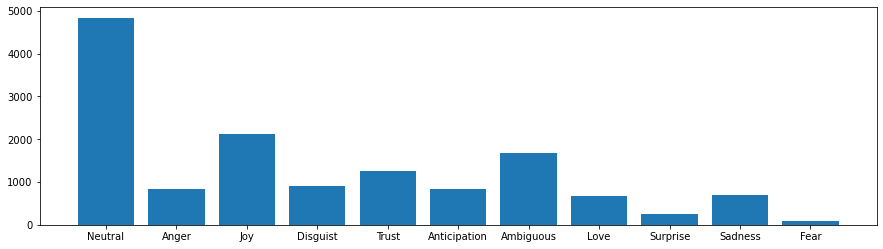

In [12]:
# Class distribution in training set
D = Counter(df_train['emotion'])
plt.rcParams["figure.figsize"] = (15,4)
plt.bar(range(len(D)), list(D.values()), align='center')
plt.xticks(range(len(D)), list(D.keys()))
plt.show()

In [13]:
# Min, Max, Avg no of sentences per class in Training set
print('Min no. of sentences: ', min(D.values()))
print('Max no. of sentences: ', max(D.values()))
print('Avg no. of sentences: ', mean(D.values()))
print('Median of sentences: ', median(D.values()))

Min no. of sentences:  100
Max no. of sentences:  4841
Avg no. of sentences:  1291.6363636363637
Median of sentences:  834


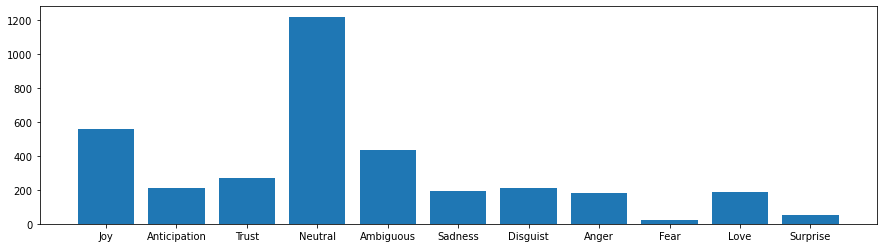

In [14]:
# Class distribution in dev set
D = Counter(df_dev['emotion'])
plt.rcParams["figure.figsize"] = (15,4)
plt.bar(range(len(D)), list(D.values()), align='center')
plt.xticks(range(len(D)), list(D.keys()))
plt.show()

In [15]:
# Min, Max, Avg no of sentences per class in Dev set
print('Min no. of sentences: ', min(D.values()))
print('Max no. of sentences: ', max(D.values()))
print('Avg no. of sentences: ', mean(D.values()))
print('Median of sentences: ', median(D.values()))

Min no. of sentences:  23
Max no. of sentences:  1222
Avg no. of sentences:  322.90909090909093
Median of sentences:  210


In [16]:
def tokenize(s: str):
    return s.split()

In [17]:
# variation in length of sentences in train set
len_of_tokens = []
for index, row in df_train.iterrows():
    tokens = tokenize((row['comment']).lower())
    len_of_tokens.append(len(tokens))
print('Min no. of tokens: ', min(len_of_tokens))
print('Max no. of tokens: ', max(len_of_tokens))
print('Avg no. of tokens: ', mean(len_of_tokens))
print('Median of no. of tokens: ', median(len_of_tokens))

Min no. of tokens:  2
Max no. of tokens:  181
Avg no. of tokens:  9.713330518018019
Median of no. of tokens:  7.0


In [18]:
# variation in length of sentences in dev set
len_of_tokens = []
for index, row in df_dev.iterrows():
    tokens = tokenize((row['comment']).lower())
    len_of_tokens.append(len(tokens))
print('Min no. of tokens: ', min(len_of_tokens))
print('Max no. of tokens: ', max(len_of_tokens))
print('Avg no. of tokens: ', mean(len_of_tokens))
print('Median of no. of tokens: ', median(len_of_tokens))

Min no. of tokens:  2
Max no. of tokens:  189
Avg no. of tokens:  9.949042792792794
Median of no. of tokens:  7.0


In [19]:
# variation in length of sentences in test set
len_of_tokens = []
for index, row in df_test.iterrows():
    tokens = tokenize((row['comment']).lower())
    len_of_tokens.append(len(tokens))
print('Min no. of tokens: ', min(len_of_tokens))
print('Max no. of tokens: ', max(len_of_tokens))
print('Avg no. of tokens: ', mean(len_of_tokens))
print('Median of no. of tokens: ', median(len_of_tokens))

Min no. of tokens:  2
Max no. of tokens:  203
Avg no. of tokens:  9.705405405405406
Median of no. of tokens:  7.0
